# **Read & Preprocessing Data**

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import colors
import sklearn
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

np.random.seed(42)

In [ ]:
# Membaca file
df_productivity = pd.read_csv('https://docs.google.com/spreadsheets/d/10Jx_uq-YSBNm6xeTVVz3vqt0V_zwNgSit8t-1O5grfg/export?format=csv&gid=525662292')
df_emissions = pd.read_csv('https://docs.google.com/spreadsheets/d/1l48OFgP5gDr_O7tYzxXJitTK1S1yHIDv0bfVFz5gsvg/export?format=csv&gid=645227798')
df_renewable_supply = pd.read_csv('https://drive.google.com/uc?export=download&id=1Q5OtzPg1MZH9YgeDB-eaM32aP6MkDXJd')

In [ ]:
# Data info dan data head dari data productivity
df_productivity.info()
df_productivity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STRUCTURE                 1001 non-null   object 
 1   STRUCTURE_ID              1001 non-null   object 
 2   STRUCTURE_NAME            1001 non-null   object 
 3   ACTION                    1001 non-null   object 
 4   REF_AREA                  1001 non-null   object 
 5   Reference area            1001 non-null   object 
 6   FREQ                      1001 non-null   object 
 7   Frequency of observation  1001 non-null   object 
 8   MEASURE                   1001 non-null   object 
 9   Measure                   1001 non-null   object 
 10  UNIT_MEASURE              1001 non-null   object 
 11  Unit of measure           1001 non-null   object 
 12  ACTIVITY                  1001 non-null   object 
 13  Economic activity         1001 non-null   object 
 14  TIME_PER

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,UNIT_MULT,Unit multiplier,PRICE_BASE,Price base,BASE_PER,Base period,TIMELINESS,Timeliness,DECIMALS,Decimals
0,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MEX,Mexico,A,Annual,CO2_PBPROD,"Production-based CO2 productivity, GDP per uni...",...,0,Units,Q,Constant prices,2015,NaN,2,2 years lag,2,Two
1,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MEX,Mexico,A,Annual,CO2_PBPROD,"Production-based CO2 productivity, GDP per uni...",...,0,Units,Q,Constant prices,2015,NaN,2,2 years lag,2,Two
2,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MEX,Mexico,A,Annual,CO2_PBPROD,"Production-based CO2 productivity, GDP per uni...",...,0,Units,Q,Constant prices,2015,NaN,2,2 years lag,2,Two
3,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MEX,Mexico,A,Annual,CO2_PBPROD,"Production-based CO2 productivity, GDP per uni...",...,0,Units,Q,Constant prices,2015,NaN,2,2 years lag,2,Two
4,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MEX,Mexico,A,Annual,CO2_PBPROD,"Production-based CO2 productivity, GDP per uni...",...,0,Units,Q,Constant prices,2015,NaN,2,2 years lag,2,Two


In [ ]:
# Data info dan data head dari data emissions CO2
df_emissions.info()
df_emissions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STRUCTURE                 2058 non-null   object 
 1   STRUCTURE_ID              2058 non-null   object 
 2   STRUCTURE_NAME            2058 non-null   object 
 3   ACTION                    2058 non-null   object 
 4   REF_AREA                  2058 non-null   object 
 5   Reference area            2058 non-null   object 
 6   FREQ                      2058 non-null   object 
 7   Frequency of observation  2058 non-null   object 
 8   MEASURE                   2058 non-null   object 
 9   Measure                   2058 non-null   object 
 10  UNIT_MEASURE              2058 non-null   object 
 11  Unit of measure           2058 non-null   object 
 12  ACTIVITY                  2058 non-null   object 
 13  Economic activity         2058 non-null   object 
 14  TIME_PER

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,UNIT_MULT,Unit multiplier,PRICE_BASE,Price base,BASE_PER,Base period,TIMELINESS,Timeliness,DECIMALS,Decimals
0,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,AZE,Azerbaijan,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,6,Millions,_Z,Not applicable,NaN,NaN,2,2 years lag,2,Two
1,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,AZE,Azerbaijan,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,6,Millions,_Z,Not applicable,NaN,NaN,2,2 years lag,2,Two
2,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,AZE,Azerbaijan,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,6,Millions,_Z,Not applicable,NaN,NaN,2,2 years lag,2,Two
3,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,AZE,Azerbaijan,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,6,Millions,_Z,Not applicable,NaN,NaN,2,2 years lag,2,Two
4,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,AZE,Azerbaijan,A,Annual,CO2_PBEM,Production-based CO2 emissions,...,6,Millions,_Z,Not applicable,NaN,NaN,2,2 years lag,2,Two


In [ ]:
# Data info dan data head dari data renewable energy supply
df_renewable_supply.info()
df_renewable_supply.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STRUCTURE                 150 non-null    object 
 1   STRUCTURE_ID              150 non-null    object 
 2   STRUCTURE_NAME            150 non-null    object 
 3   ACTION                    150 non-null    object 
 4   REF_AREA                  150 non-null    object 
 5   Reference area            150 non-null    object 
 6   FREQ                      150 non-null    object 
 7   Frequency of observation  150 non-null    object 
 8   MEASURE                   150 non-null    object 
 9   Measure                   150 non-null    object 
 10  UNIT_MEASURE              150 non-null    object 
 11  Unit of measure           150 non-null    object 
 12  ACTIVITY                  150 non-null    object 
 13  Economic activity         150 non-null    object 
 14  TIME_PERIO

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,UNIT_MULT,Unit multiplier,PRICE_BASE,Price base,BASE_PER,Base period,TIMELINESS,Timeliness,DECIMALS,Decimals
0,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,KHM,Cambodia,A,Annual,RE_TPES_EBIOM,Renewable energy supply (excluding solid biofu...,...,0,Units,_Z,Not applicable,NaN,NaN,1,"1 year lag, timely",2,Two
1,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,LBY,Libya,A,Annual,RE_TPES_EBIOM,Renewable energy supply (excluding solid biofu...,...,0,Units,_Z,Not applicable,NaN,NaN,1,"1 year lag, timely",2,Two
2,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,PER,Peru,A,Annual,RE_TPES_EBIOM,Renewable energy supply (excluding solid biofu...,...,0,Units,_Z,Not applicable,NaN,NaN,1,"1 year lag, timely",2,Two
3,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,DEU,Germany,A,Annual,RE_TPES_EBIOM,Renewable energy supply (excluding solid biofu...,...,0,Units,_Z,Not applicable,NaN,NaN,1,"1 year lag, timely",2,Two
4,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MMR,Myanmar,A,Annual,RE_TPES_EBIOM,Renewable energy supply (excluding solid biofu...,...,0,Units,_Z,Not applicable,NaN,NaN,1,"1 year lag, timely",2,Two


In [ ]:
# Mengambil data nilai producitivity dari kolom OBS_VALUE
select_df1 = df_productivity[['REF_AREA','Reference area','TIME_PERIOD','OBS_VALUE']]
rename_df1 = select_df1.rename(columns={'OBS_VALUE':'productivity'})
rename_df1.head()

,REF_AREA,Reference area,TIME_PERIOD,productivity
0,MEX,Mexico,2015,5.22
1,MEX,Mexico,2021,6.27
2,MEX,Mexico,2020,6.24
3,MEX,Mexico,2019,5.75
4,MEX,Mexico,2018,5.87


In [ ]:
# Mengambil data nilai emissions dari kolom OBS_VALUE
select_df2 = df_emissions.loc[df_emissions['Unit of measure']=='Tonnes',['REF_AREA','Reference area','TIME_PERIOD','OBS_VALUE']]
rename_df2 = select_df2.rename(columns={'OBS_VALUE':'emissions'})
rename_df2

,REF_AREA,Reference area,TIME_PERIOD,emissions
0,AZE,Azerbaijan,2015,30.54
1,AZE,Azerbaijan,2021,33.97
2,AZE,Azerbaijan,2020,31.96
3,AZE,Azerbaijan,2019,33.19
4,AZE,Azerbaijan,2018,31.40
...,...,...,...,...
2047,KOR,Korea,2016,588.77
2054,TUN,Tunisia,2016,25.21
2055,CIV,Côte d’Ivoire,2016,9.40
2056,IRL,Ireland,2016,37.22


In [ ]:
# Mengambil data nilai renewable energy supply dari kolom OBS_VALUE
select_df3 = df_renewable_supply[['REF_AREA','Reference area','TIME_PERIOD','OBS_VALUE']]
rename_df3 = select_df3.rename(columns={'OBS_VALUE':'renewable_supply'})
rename_df3

,REF_AREA,Reference area,TIME_PERIOD,renewable_supply
0,KHM,Cambodia,2020,4.41
1,LBY,Libya,2020,0.00
2,PER,Peru,2020,14.33
3,DEU,Germany,2020,11.76
4,MMR,Myanmar,2020,4.01
...,...,...,...,...
145,CMR,Cameroon,2020,4.64
146,BRA,Brazil,2020,21.66
147,MYS,Malaysia,2020,3.61
148,GNQ,Equatorial Guinea,2020,2.23


In [ ]:
# Menggabungkan data 1, 2 dan 3
merged12 = pd.merge(rename_df1, rename_df2, on=['REF_AREA','Reference area','TIME_PERIOD'], how='inner')
df_merged = pd.merge(merged12, rename_df3, on=['REF_AREA','Reference area','TIME_PERIOD'],how='inner')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   REF_AREA          140 non-null    object 
 1   Reference area    140 non-null    object 
 2   TIME_PERIOD       140 non-null    int64  
 3   productivity      140 non-null    float64
 4   emissions         140 non-null    float64
 5   renewable_supply  140 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 6.7+ KB


In [ ]:
# Mengurutkan berdasarkan negara
df = df_merged.sort_values(by=['Reference area','TIME_PERIOD'], ascending=[True, True]).reset_index(drop=True)
df

,REF_AREA,Reference area,TIME_PERIOD,productivity,emissions,renewable_supply
0,ALB,Albania,2020,10.88,3.39,26.48
1,DZA,Algeria,2020,4.21,134.52,0.10
2,AGO,Angola,2020,11.79,15.29,7.89
3,ARG,Argentina,2020,5.02,149.02,5.36
4,ARM,Armenia,2020,5.24,6.33,4.99
...,...,...,...,...,...,...
135,UZB,Uzbekistan,2020,2.41,109.65,0.95
136,VNM,Viet Nam,2020,3.24,297.62,7.45
137,YEM,Yemen,2020,10.55,8.59,1.46
138,ZMB,Zambia,2020,10.34,5.83,10.18


In [ ]:
df

,REF_AREA,Reference area,TIME_PERIOD,productivity,emissions,renewable_supply
0,ALB,Albania,2020,10.88,3.39,26.48
1,DZA,Algeria,2020,4.21,134.52,0.10
2,AGO,Angola,2020,11.79,15.29,7.89
3,ARG,Argentina,2020,5.02,149.02,5.36
4,ARM,Armenia,2020,5.24,6.33,4.99
...,...,...,...,...,...,...
135,UZB,Uzbekistan,2020,2.41,109.65,0.95
136,VNM,Viet Nam,2020,3.24,297.62,7.45
137,YEM,Yemen,2020,10.55,8.59,1.46
138,ZMB,Zambia,2020,10.34,5.83,10.18


**Penjelasan Dataset**

Data diperoleh dari Organization for Economic Co-operation and Development (OECD)


Terdapat 8 kolom dan total 136 baris data secara keseluruhan

1. REF_AREA: Kode Negara yang berupa 3 huruf kapital (contoh Indonesia: IDN)
2. Reference area: Nama Negara
3. TIME_PERIOD: Tahun pada saat data tersebut diambil (pada dataset ini hanya digunakan 1 tahun yaitu 2020)
4. productivity: PDB riil yang dihasilkan per satuan emisi CO2 (USD/kg). Termasuk emisi CO2 dari pembakaran batubara, minyak bumi, gas alam dan bahan bakar lainnya.
5. emissions: emisi dari pembakaran batubara, minyak, gas alam dan bahan bakar lainnya dalam juta metrik ton.
6. renewable_supply: bagian dari sumber daya terbarukan tidak termasuk biofuel padat dalam TES (dinyatakan dalam persentase). Energi terbarukan meliputi tenaga air, panas bumi, tenaga surya (panas dan PV), angin dan energi pasang surut/gelombang/laut, serta energi terbarukan yang mudah terbakar (biomassa cair, biogas) dan limbah (sampah kota terbarukan).



# **Data Preparation**

## 1. Data Info dan Describe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   REF_AREA          140 non-null    object 
 1   Reference area    140 non-null    object 
 2   TIME_PERIOD       140 non-null    int64  
 3   productivity      140 non-null    float64
 4   emissions         140 non-null    float64
 5   renewable_supply  140 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 6.7+ KB


Berdasarkan informasi di atas, dataset terdiri dari 140 baris data dan 6 kolom. Setiap kolom memiliki tipe data tertentu yang merepresentasikan karakteristik atau atribut yang dianalisis dalam dataset.

In [ ]:
df.describe()

,TIME_PERIOD,productivity,emissions,renewable_supply
count,140.0,140.000000,140.000000,140.000000
mean,2020.0,7.273571,216.089643,8.801571
std,0.0,4.709659,943.760509,12.699065
min,2020.0,1.430000,1.150000,0.000000
25%,2020.0,4.202500,7.192500,1.455000
50%,2020.0,6.380000,25.570000,4.460000
75%,2020.0,9.077500,97.717500,10.780000
max,2020.0,35.670000,10053.320000,89.470000


## 2. Missing Value

In [ ]:
# Memeriksa apakah terdapat missing value
df.isnull().sum()

,0
REF_AREA,0
Reference area,0
TIME_PERIOD,0
productivity,0
emissions,0
renewable_supply,0


Dataset ini tidak memiliki nilai yang hilang (missing value), sehingga seluruh data dapat digunakan secara utuh untuk analisis tanpa perlu proses imputasi atau penanganan nilai yang kosong.

## 3. Duplicate Value

In [ ]:
# Memeriksa apakah terdapat duplicate pada Reference area dan TIME_PERIOD
duplicates = df.duplicated(subset=['REF_AREA', 'Reference area', 'TIME_PERIOD'])
duplicates.unique()

array([False])

Hasil analisis menunjukkan bahwa nilai false pada pengecekan duplikasi berarti tidak ada data duplikat dalam dataset.

In [ ]:
# Memeriksa total duplicate data
total_duplicates = df.duplicated(subset=['REF_AREA', 'Reference area', 'TIME_PERIOD']).sum()
print(f"Jumlah baris duplikat: {total_duplicates}")

Jumlah baris duplikat: 0


Dataset ini tidak memiliki duplikasi data, sehingga seluruh baris data unik dan dapat langsung digunakan untuk analisis tanpa proses deduplikasi.

## 4. Outlier

Deteksi dan handling data outlier diperlukan supaya data menjadi lebih baik saat dikelola. Dan dari kolom yang diambil sangat mungkin terdapat data outlier. Pada kasus ini dat aoutlier akan dideteksi melalui box plot.

Membuat box plot (plot kotak) dari kolom 'productivity', 'emissions' dan 'renewable_supply' pada DataFrame df.

Box plot adalah jenis visualisasi yang menampilkan distribusi data berdasarkan lima angka ringkasan: nilai minimum, kuartil pertama (Q1), median (Q2), kuartil ketiga (Q3), dan nilai maksimum.

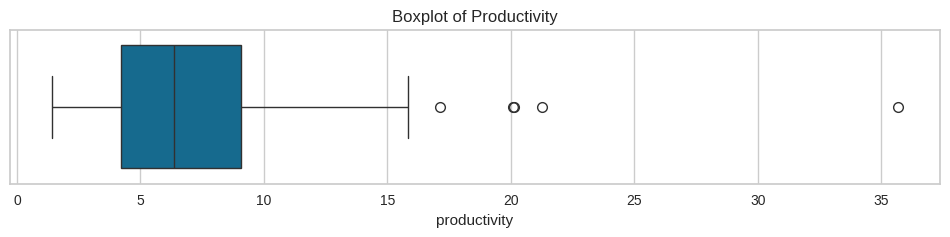

In [ ]:
# menggunakan boxplot untuk mendeteksi outlier pada kolom productivity
plt.figure(figsize=(12, 2))
sns.boxplot(x=df['productivity'])
plt.title('Boxplot of Productivity')
plt.show()

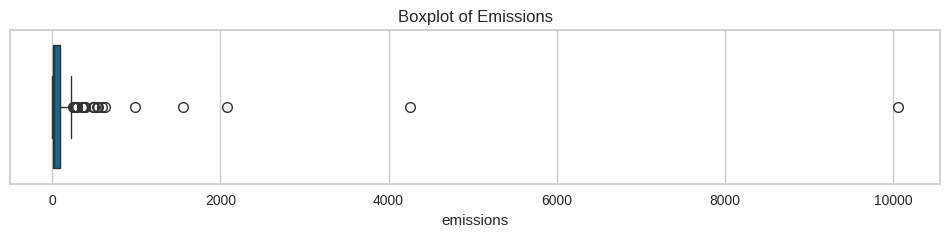

In [ ]:
# menggunakan boxplot untuk mendeteksi outlier pada kolom emissions
plt.figure(figsize=(12, 2))
sns.boxplot(x=df['emissions'])
plt.title('Boxplot of Emissions')
plt.show()

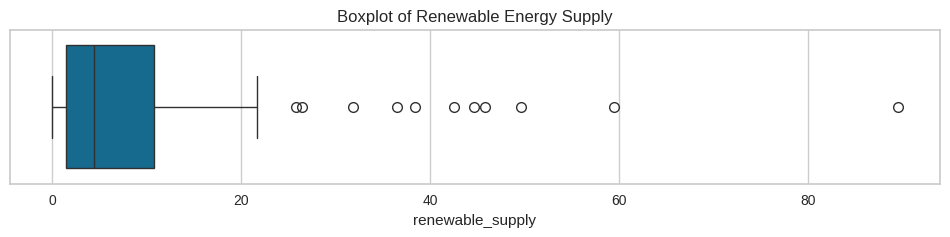

In [ ]:
# menggunakan boxplot untuk mendeteksi outlier pada kolom renewable_supply
plt.figure(figsize=(12, 2))
sns.boxplot(x=df['renewable_supply'])
plt.title('Boxplot of Renewable Energy Supply')
plt.show()

Berdasarkan ketiga plot diatas dapat dilihat bahwa terdapat data outlier yang memiliki nilai lebih besar dari sebagian besar data lainnya. Bahkan pada sebaran data 'emissions' dapat dilihat terdapat data outlier yang nilainya sangat besar sekali dibandingkan rata-ratanya.

Akan tetapi dalam kasus ini, kami tidak melakukan penghapusan data outlier, hal ini didasarkan pada beberapa hal:
1. Dataset yang kami ambil bersumber dari OECD (The Organisation for Economic Co-operation and Development) yang umumnya sudah divalidasi dengan ketat.
2. Perbedaan nilai yang ekstrim lebih mungkin mencerminkan karakteristik negara yang memang berbeda.
3. Dalam konteks clustering, outlier bisa membentuk cluster tersendiri yang meaningful dan menghapus data outlier bisa menghilangkan informasi penting tentang pola yang ada.

## 5. Feature Encoding

Label encoding dilakukan untuk mengubah data kategorikal menjadi data numerik sehingga dapat digunakan dalam model machine learning. Hal ini penting karena kebanyakan algoritma machine learning hanya dapat memproses data numerik.

Akan tetapi, pada data yang kami gunakan ini tidak dilakukan feature encoding, hal ini dikarenakan kolom seperti REF_AREA, Reference area dan TIME_PERIOD yang mengandung data bukan float tidak memerlukan perlakukan ini.

Berdasarkan sampel data yang ditunjukkan, semua data adalah tahun 2020 sehingga tidak perlu adanya label encoding pada data TIME_PERIOD atau tahun.

Kemudian untuk data Reference area atau data Negara tidak perlu dilakukan label encoding karena categorical nominal data (tidak ada urutan/hierarki). Pemberikan label pada nama Negara hanya akan menyebabkan bias pada data (misal Albania: 0 dan Azerbaijan: 3, maka bisa saja terjadi kesalahan interpretasi bahwa Azerbaijan lebih tinggi dari Albania).

# **Feature Engineering**

## Fitur 1: Sustainability Category

Text(0, 0.5, 'Frekuensi')

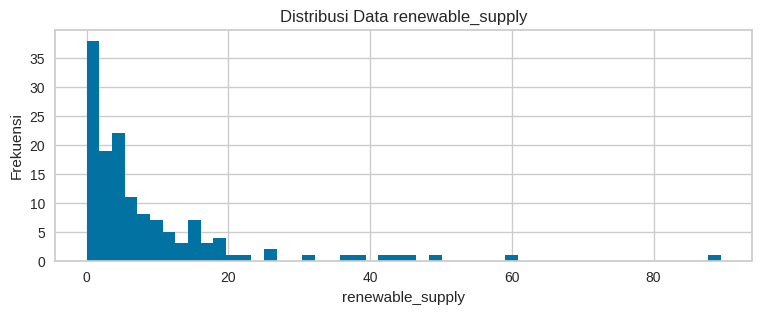

In [ ]:
# Melihat distribusi dari kolom renewable_supply dengan histogram
plt.figure(figsize=(9, 3))
df['renewable_supply'].hist(bins=50)
plt.title('Distribusi Data renewable_supply')
plt.xlabel('renewable_supply')
plt.ylabel('Frekuensi')

In [ ]:
# Melakukan data binning
# Sustainability Category
# Kategorisasi negara berdasarkan renewable supply
df['sustainability_category'] = pd.cut(df['renewable_supply'],
                                       bins=[-1, 20, 40, 60, 80, 101],
                                       labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Melihat update dataframe setelah penambahan fitur
df.head()

,REF_AREA,Reference area,TIME_PERIOD,productivity,emissions,renewable_supply,sustainability_category
0,ALB,Albania,2020,10.88,3.39,26.48,Low
1,DZA,Algeria,2020,4.21,134.52,0.10,Very Low
2,AGO,Angola,2020,11.79,15.29,7.89,Very Low
3,ARG,Argentina,2020,5.02,149.02,5.36,Very Low
4,ARM,Armenia,2020,5.24,6.33,4.99,Very Low


Fitur Sustainability Category ini memberikan klasifikasi kepada seberapa banyak renewable energy supply yang dimiliki oleh setiap negara. Outputnya berupa data object, dan terdapat 5 tingkatan yaitu Very Low, Low, Medium, High, Very High.

## Fitur 2: Country Pattern

Text(0, 0.5, 'Frekuensi')

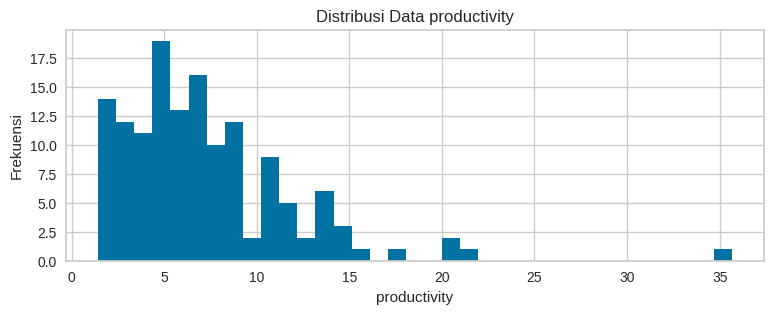

In [ ]:
# Melihat distribusi dari kolom productivity dengan histogram
plt.figure(figsize=(9, 3))
df['productivity'].hist(bins=35)
plt.title('Distribusi Data productivity')
plt.xlabel('productivity')
plt.ylabel('Frekuensi')

In [ ]:
# Mengambil data min, Q1, Q2, Q3 dan mx dari kolom productivity
min_productivity = df['productivity'].min()
q1_productivity = df['productivity'].quantile(0.25)
q2_productivity = df['productivity'].quantile(0.5)
q3_productivity = df['productivity'].quantile(0.75)
max_productivity = df['productivity'].max()
print("Min productivity:", min_productivity)
print("Q1 productivity:", q1_productivity)
print("Q2 productivity:", q2_productivity)
print("Q3 productivity:", q3_productivity)
print("Max productivity:", max_productivity)

Min productivity: 1.43
Q1 productivity: 4.2025
Q2 productivity: 6.38
Q3 productivity: 9.0775
Max productivity: 35.67


In [ ]:
# Melakukan data binning
df['country_pattern'] = pd.cut(df['productivity'],
                               bins=[min_productivity-1, q1_productivity, q2_productivity, q3_productivity, max_productivity+1],
                               labels=['Emerging Polluters', 'Industrial Giants', 'Developing Sustainers', 'Green Leaders'])

# Melihat update dataframe setelah penambahan fitur
df.head()

,REF_AREA,Reference area,TIME_PERIOD,productivity,emissions,renewable_supply,sustainability_category,country_pattern
0,ALB,Albania,2020,10.88,3.39,26.48,Low,Green Leaders
1,DZA,Algeria,2020,4.21,134.52,0.10,Very Low,Industrial Giants
2,AGO,Angola,2020,11.79,15.29,7.89,Very Low,Green Leaders
3,ARG,Argentina,2020,5.02,149.02,5.36,Very Low,Industrial Giants
4,ARM,Armenia,2020,5.24,6.33,4.99,Very Low,Industrial Giants


Fitur Country Patter memberikan informasi mengenai klasifikasi dari tiap negara berdasarkan nilai productivitynya. Sebagaimana yang sudah diketahui sebelumnya bahwa nilai productivity merupakan seberapa banyak GDP yang dihasilkan per kilogram emisi CO2. Oleh karena itu, pada fitur ini tiap negara diberikan label sesuai dengan kondisi productivitynya. Terdapat 4 jenis label, yakni:

* "Green Leaders": Produktivitas tinggi, emisi rendah (contoh: negara Skandinavia)
* "Industrial Giants": Produktivitas tinggi, emisi tinggi (contoh: negara industri besar)
* "Developing Sustainers": Produktivitas menengah, emisi rendah
* "Emerging Polluters": Produktivitas rendah, emisi tinggi

In [ ]:
# cek kembali
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   REF_AREA                 140 non-null    object  
 1   Reference area           140 non-null    object  
 2   TIME_PERIOD              140 non-null    int64   
 3   productivity             140 non-null    float64 
 4   emissions                140 non-null    float64 
 5   renewable_supply         140 non-null    float64 
 6   sustainability_category  140 non-null    category
 7   country_pattern          140 non-null    category
dtypes: category(2), float64(3), int64(1), object(2)
memory usage: 7.4+ KB


# **Statistics for Data Science & Exploratory Data Analysis (EDA)**

### 1. Mengelaborasi Features dan Tipe Data

In [ ]:
#identifikasi setiap feature dan melihat tipe datanya dengan df.info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   REF_AREA                 140 non-null    object  
 1   Reference area           140 non-null    object  
 2   TIME_PERIOD              140 non-null    int64   
 3   productivity             140 non-null    float64 
 4   emissions                140 non-null    float64 
 5   renewable_supply         140 non-null    float64 
 6   sustainability_category  140 non-null    category
 7   country_pattern          140 non-null    category
dtypes: category(2), float64(3), int64(1), object(2)
memory usage: 7.4+ KB


**HASIL ANALISA**

Dari informasi yang sudah di berikan pada df.info sebelumnya, maka dapat kita ambil informasi berikut

**1. Identifikasi Setiap Kolom (Feature)**
- REF_AREA: Kode area yang merepresentasikan negara/wilayah. Contoh: "ALB" untuk Albania, "DZA" untuk Algeria.
- Reference area: Nama lengkap dari negara atau wilayah yang terkait dengan kode di kolom REF_AREA. Contoh: "Albania", "Algeria".
- TIME_PERIOD: Periode waktu (tahun). Contoh: 2015, 2016.
productivity: Angka produktivitas dalam bentuk desimal.
- emissions: Total emisi keseluruhan.
- renewable_supply : Data energi terbarukan

**2. Tipe Data Setiap Kolom**
- REF_AREA : object (kategori)
- Reference area: object (kategori).
- TIME_PERIOD: int64 (numerik).
- productivity: float64 (numerik).
- emissions: float64 (numerik).
- renewable_supply : float64(numerik)

### 2. Menjelaskan Kondisi dan Perbedaan Penggunaan Mean, Median, dan Modus

In [ ]:
print("\n================= Mean, Median, and Mode =================")
for column in ['productivity', 'emissions', 'renewable_supply']:
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]  # ambil nilai pertama jika modus memiliki beberapa hasil
    print(f"{column} - Mean: {mean:.3f}, Median: {median:.3f}, Mode: {mode:.3f}")


================= Mean, Median, and Mode =================
productivity - Mean: 7.274, Median: 6.380, Mode: 2.390
emissions - Mean: 216.090, Median: 25.570, Mode: 1.150
renewable_supply - Mean: 8.802, Median: 4.460, Mode: 0.000


**KESIMPULAN**

1. Productivity

**Mean: 7.28, Median: 6.38, Mode: 2.39**

Mean lebih besar dari median, dan median lebih besar dari modus. Ini menunjukkan kemungkinan distribusi data yang miring ke kanan (positively skewed). Dengan kata lain, ada beberapa negara dengan tingkat produktivitas yang sangat tinggi yang menarik rata-rata ke arah yang lebih tinggi dibandingkan median.
2. Emissions:

**Mean: 216.09, Median: 25.570, Mode: 1.15**

Mean jauh lebih tinggi dari median, dan median jauh lebih tinggi dari modus. Distribusi ini kemungkinan besar sangat miring ke kanan, menunjukkan beberapa negara dengan emisi yang sangat tinggi, yang menyebabkan rata-rata meningkat jauh lebih tinggi daripada kebanyakan nilai (yang lebih rendah).

3. Renewable Supply:

**Mean: 8.80, Median: 4.46, Mode: 0.0**

Mean lebih besar dari median, yang juga lebih besar dari modus, menunjukkan distribusi yang miring ke kanan. Ini mungkin mengindikasikan bahwa sebagian besar negara memiliki sumber energi terbarukan yang rendah, dengan beberapa pengecualian yang memiliki nilai sangat tinggi, menaikkan rata-rata.

### 3. Menemukan dan Mendeskripsikan Statistical Five Summaries

In [ ]:
df.describe(include=float)

,productivity,emissions,renewable_supply
count,140.000000,140.000000,140.000000
mean,7.273571,216.089643,8.801571
std,4.709659,943.760509,12.699065
min,1.430000,1.150000,0.000000
25%,4.202500,7.192500,1.455000
50%,6.380000,25.570000,4.460000
75%,9.077500,97.717500,10.780000
max,35.670000,10053.320000,89.470000


In [ ]:
df.shape

(140, 8)

In [ ]:
# Menampilkan Statistical Five Summaries
df.describe(percentiles=[0.25, 0.5, 0.75], include=float) # berhubung fitur yang digunakan tipe datanya float

,productivity,emissions,renewable_supply
count,140.000000,140.000000,140.000000
mean,7.273571,216.089643,8.801571
std,4.709659,943.760509,12.699065
min,1.430000,1.150000,0.000000
25%,4.202500,7.192500,1.455000
50%,6.380000,25.570000,4.460000
75%,9.077500,97.717500,10.780000
max,35.670000,10053.320000,89.470000


**Kesimpulan**

Berdasarkan hasil temuan Statistical Five Summaries dari fitur-fitur pada data yang digunakan diatas, berikut adalah beberapa insight hasilnya:

**1. Productivity:**

- Mean: 7.27, Std Dev (Standar Deviasi): 4.71. Rata-rata produktivitas cukup tinggi, namun dengan standar deviasi yang relatif besar, menunjukkan adanya variasi produktivitas yang cukup signifikan antar negara.
- Min - Max: 1.43 - 35.67. Kisaran nilai ini menunjukkan bahwa ada negara dengan produktivitas yang sangat rendah hingga sangat tinggi.
- Quartiles:
25% (Kuartil Pertama): 4.20, Median (50%): 6.38, 75% (Kuartil Ketiga): 9.07. Mayoritas negara memiliki nilai produktivitas antara 4.20 hingga 9.07, yang menunjukkan bahwa sebagian besar negara berada di bawah mean, dengan beberapa negara yang memiliki nilai jauh di atas rata-rata.

**2. Emissions:**

- Mean: 216.08, Std Dev: 943.76. Rata-rata emisi karbon cukup tinggi, namun standar deviasinya sangat besar, menandakan variasi yang luar biasa antar negara dalam hal emisi karbon.
- Min - Max: 1.15 - 10053.32. Nilai maksimum yang sangat besar dibandingkan nilai minimum menunjukkan bahwa ada beberapa negara dengan emisi karbon sangat tinggi, jauh melebihi negara-negara lainnya.
- Quartiles:
25%: 7.19, Median: 25.57, 75%: 97.71. Sebagian besar negara memiliki emisi di bawah rata-rata, dengan banyak negara pada kisaran yang lebih rendah (di bawah 25.57), dan beberapa outlier di rentang yang jauh lebih tinggi.

**3. Renewable Supply:**

- Mean: 8.8, Std Dev: 12.7. Rata-rata penggunaan energi terbarukan relatif rendah, dan standar deviasi yang besar menunjukkan adanya disparitas dalam pemanfaatan energi terbarukan di berbagai negara.
- Min - Max: 0.0 - 89.47. Dengan nilai minimum 0, ada negara yang sama sekali tidak menggunakan energi terbarukan. Nilai maksimum yang tinggi (89.47) menunjukkan bahwa beberapa negara memiliki kontribusi besar dari energi terbarukan.
- Quartiles:
25%: 1.45, Median: 4.46, 75%: 10.78. Sebagian besar negara menggunakan energi terbarukan dalam proporsi yang rendah, dengan hanya sedikit negara yang mencapai angka yang tinggi.



### 4. Mendeskripsikan Distribusi Data

<Figure size 1200x600 with 0 Axes>

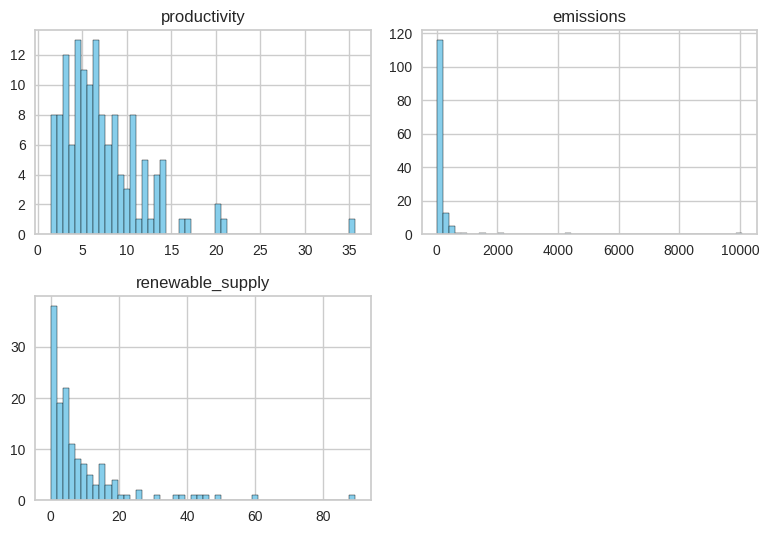

In [ ]:
plt.figure(figsize=(12, 6))
df[['productivity', 'emissions', 'renewable_supply']].hist(bins=50, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

**Kesimpulan**

1. Productivity:

Distribusi productivity sangat miring ke kanan (right-skewed). Mayoritas negara memiliki nilai produktivitas di bawah 10, dan hanya sedikit negara dengan nilai di atas 20. Ini menunjukkan bahwa kebanyakan negara memiliki tingkat produktivitas karbon yang relatif rendah, dengan hanya beberapa negara yang mencapai nilai produktivitas yang tinggi.

2. Emissions:

Distribusi emissions juga sangat miring ke kanan, di mana sebagian besar negara memiliki nilai emisi yang rendah (kurang dari 50). Terdapat beberapa negara dengan emisi yang jauh lebih tinggi (outliers), yang menunjukkan adanya perbedaan besar dalam tingkat emisi karbon antar negara.

3. Renewable Supply:

Distribusi renewable_supply mirip dengan dua variabel sebelumnya, sangat miring ke kanan. Sebagian besar negara memiliki suplai energi terbarukan yang rendah (di bawah 20). Hanya sedikit negara yang memiliki tingkat renewable supply yang tinggi, dan ada juga negara yang sama sekali tidak menggunakan energi terbarukan.

### 5. Hitunglah Korelasi Antar-Fitur

In [ ]:
# Menampilkan korelasi antar fitur-fitur
df[['productivity', 'emissions', 'renewable_supply']].corr()

,productivity,emissions,renewable_supply
productivity,1.000000,-0.158655,0.172012
emissions,-0.158655,1.000000,-0.047509
renewable_supply,0.172012,-0.047509,1.000000


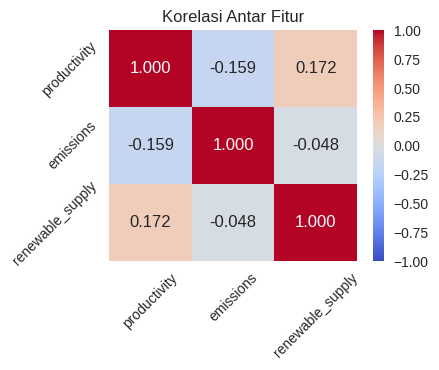

In [ ]:
# Menampilkan korelasi dalam bentuk heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(df[['productivity', 'emissions', 'renewable_supply']].corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Korelasi Antar Fitur')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Hasil heatmap korelasi antar fitur menunjukkan bahwa hubungan antara productivity, emissions, dan renewable supply pada dataset ini cenderung lemah. Korelasi antara productivity dan emissions bernilai -0.159, menunjukkan sedikit kecenderungan bahwa peningkatan produktivitas mungkin berhubungan dengan penurunan emisi, meskipun pengaruhnya sangat kecil. Sementara itu, productivity dan renewable supply memiliki korelasi positif lemah sebesar 0.172, mengindikasikan bahwa negara-negara dengan produktivitas lebih tinggi mungkin sedikit memiliki pasokan energi terbarukan yang lebih tinggi. Korelasi antara emissions dan renewable supply adalah -0.048, menunjukkan sedikit kecenderungan bahwa negara-negara dengan emisi lebih tinggi memiliki pasokan energi terbarukan yang lebih rendah. Namun, secara keseluruhan, ketiga fitur ini cenderung independen dengan korelasi yang sangat tidak tidak signifikan.

#**Data Scaling**

Data Scaling adalah proses transformasi data untuk memastikan bahwa semua fitur dalam dataset berada pada skala yang sama atau serupa. Hal ini penting terutama ketika algoritma machine learning sensitif terhadap perbedaan skala antar fitur, seperti K-Means, SVM, atau algoritma berbasis gradien. Scaling tidak mengubah distribusi data tetapi hanya mengubah ukuran (scale) nilainya.

Tujuan utama data scaling adalah:

Menghindari fitur dengan nilai besar mendominasi fitur lain.
Mempercepat konvergensi dalam algoritma berbasis optimasi.
Meningkatkan akurasi dan performa model.

Jenis-Jenis Data Scaling

1. StandardScaler
StandardScaler melakukan scaling dengan menstandarisasi fitur berdasarkan mean dan standard deviation. Data diubah menjadi distribusi dengan rata-rata 0 dan standar deviasi 1 (z-score normalization).

2. RobustScaler
RobustScaler melakukan scaling dengan menggunakan median dan interquartile range (IQR) sehingga lebih tahan terhadap outliers.

## Robust Scaler


In [ ]:
from sklearn.preprocessing import RobustScaler

# Inisialisasi RobustScaler
scaler = RobustScaler()

# Standarisasi hanya pada kolom 'emissions'
df['emissions_scaled'] = scaler.fit_transform(df[['emissions']])

# Melihat hasil transformasi
df[['emissions', 'emissions_scaled']].head()

,emissions,emissions_scaled
0,3.39,-0.245015
1,134.52,1.203535
2,15.29,-0.113560
3,149.02,1.363712
4,6.33,-0.212538


In [ ]:
df.head()

,REF_AREA,Reference area,TIME_PERIOD,productivity,emissions,renewable_supply,sustainability_category,country_pattern,emissions_scaled
0,ALB,Albania,2020,10.88,3.39,26.48,Low,Green Leaders,-0.245015
1,DZA,Algeria,2020,4.21,134.52,0.10,Very Low,Industrial Giants,1.203535
2,AGO,Angola,2020,11.79,15.29,7.89,Very Low,Green Leaders,-0.113560
3,ARG,Argentina,2020,5.02,149.02,5.36,Very Low,Industrial Giants,1.363712
4,ARM,Armenia,2020,5.24,6.33,4.99,Very Low,Industrial Giants,-0.212538


# **Clustering**

In [ ]:
data_numeric = df[['productivity', 'emissions_scaled', 'renewable_supply']]
data_numeric.describe()

,productivity,emissions_scaled,renewable_supply
count,140.000000,140.000000,140.000000
mean,7.273571,2.104608,8.801571
std,4.709659,10.425413,12.699065
min,1.430000,-0.269760,0.000000
25%,4.202500,-0.203010,1.455000
50%,6.380000,0.000000,4.460000
75%,9.077500,0.796990,10.780000
max,35.670000,110.773267,89.470000


### **K-Means**

K-Means adalah algoritma clustering yang bekerja dengan cara membagi data menjadi K kelompok (cluster) berdasarkan kemiripan karakteristik datanya. Cara kerjanya:

* Tentukan jumlah cluster K yang diinginkan
* Pilih K titik pusat (centroid) secara acak
* Hitung jarak setiap data ke masing-masing centroid
* Kelompokkan data ke centroid terdekat
* Update posisi centroid berdasarkan rata-rata anggota cluster
* Ulangi langkah 3-5 sampai centroid tidak berubah lagi

Algoritma Clustering K-Means ini digunakan karena baik untuk menemukan kelompok negara dengan karakteristik ekonomi dan emisi yang mirip serta mudah diinterpretasi dan diimplementasikan

In [ ]:
#Silhouette Analysis
range_n_clusters = list(range(2,11))
for num_clusters in range_n_clusters:

    #initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(data_numeric)
    cluster_labels = kmeans.labels_

    #silhouette score
    silhouette_avg = silhouette_score(data_numeric, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6931641031255424
For n_clusters=3, the silhouette score is 0.7101042376388179
For n_clusters=4, the silhouette score is 0.6494637128854004
For n_clusters=5, the silhouette score is 0.31413137541415975
For n_clusters=6, the silhouette score is 0.43244839118270595
For n_clusters=7, the silhouette score is 0.41087032133516854
For n_clusters=8, the silhouette score is 0.4145199138082155
For n_clusters=9, the silhouette score is 0.311303215727147
For n_clusters=10, the silhouette score is 0.33677014849796083


Berdasarkan output diatas, dapat disimpulkan bahwa untuk n_clusters = 3 menghasilkan nilai silhouette yang tinggi, yaitu 0,7101. Semakin tinggi nilai rata-rata silhouette, menunjukkan suatu peng-cluster-an yang baik.

In [ ]:
# Nilai k optimal yang didapat dari Silhouette  Analysis
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(data_numeric)

# menambahkan kolom cluster ke dataframe df_kmeans
df_kmeans = df.copy()
df_kmeans['cluster'] = cluster_labels
df_kmeans

,REF_AREA,Reference area,TIME_PERIOD,productivity,emissions,renewable_supply,sustainability_category,country_pattern,emissions_scaled,cluster
0,ALB,Albania,2020,10.88,3.39,26.48,Low,Green Leaders,-0.245015,1
1,DZA,Algeria,2020,4.21,134.52,0.10,Very Low,Industrial Giants,1.203535,0
2,AGO,Angola,2020,11.79,15.29,7.89,Very Low,Green Leaders,-0.113560,0
3,ARG,Argentina,2020,5.02,149.02,5.36,Very Low,Industrial Giants,1.363712,0
4,ARM,Armenia,2020,5.24,6.33,4.99,Very Low,Industrial Giants,-0.212538,0
...,...,...,...,...,...,...,...,...,...,...
135,UZB,Uzbekistan,2020,2.41,109.65,0.95,Very Low,Emerging Polluters,0.928804,0
136,VNM,Viet Nam,2020,3.24,297.62,7.45,Very Low,Emerging Polluters,3.005247,0
137,YEM,Yemen,2020,10.55,8.59,1.46,Very Low,Green Leaders,-0.187572,0
138,ZMB,Zambia,2020,10.34,5.83,10.18,Very Low,Green Leaders,-0.218061,0


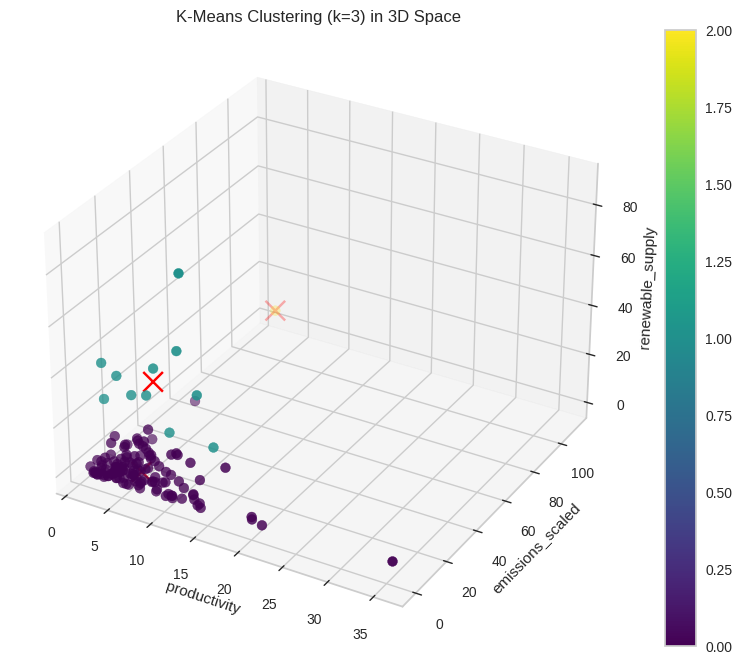

In [ ]:
# Membuat plot 3D untuk hasil clustering
k_optimal = 3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotkan hasil klaster dengan warna berdasarkan cluster_labels
scatter = ax.scatter(df_kmeans['productivity'], df_kmeans['emissions_scaled'], df_kmeans['renewable_supply'],
                     c=df_kmeans['cluster'], cmap='viridis', s=50)
# Plotkan centroid dengan warna merah dan marker yang lebih besar
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
           c='red', s=200, marker='x')

# Menambahkan label dan judul
ax.set_xlabel('productivity')
ax.set_ylabel('emissions_scaled')
ax.set_zlabel('renewable_supply')
plt.title(f'K-Means Clustering (k={k_optimal}) in 3D Space')

# Menambahkan color bar untuk cluster
plt.colorbar(scatter)

# Menampilkan plot
plt.show()


**Interpretasi Hasil Clustering K-means**

Berdasarkan hasil clustering dan visualisasi yang telah dilakukan, kita dapat menyimpulkan bahwa data telah dibagi menjadi tiga cluster yaitu cluster 0, cluster 1, dan cluster 2. Yang dimana setiap cluster mencerminkan keseimbangan yang berbeda-beda antara emisi, produktivitas, dan ketergantungan pada energi terbarukan.


**Cluster 0 : Produktivitas Sedang, Emisi Tinggi, Energi Terbarukan Rendah**

cluster ini terdiri dari negara-negara dengan tingkat produktivitas sedang, tetapi menghadapi tantangan besar dalam hal efisiensi energi dan keberlanjutan. Produktivitas di cluster ini cukup bervariasi, tetapi emisi yang dihasilkan relatif tinggi, hal ini menunjukkan bahwa mereka bertergantungan besar pada bahan bakar fosil. Selain itu, kontribusi energi terbarukan sangat rendah, mengindikasikan minimnya adopsi teknologi ramah lingkungan. Untuk mengatasi tantangan ini, diperlukan langkah-langkah strategis seperti peningkatan efisiensi energi melalui modernisasi teknologi, diversifikasi pasokan energi dengan memperkenalkan energi terbarukan seperti surya atau angin, serta kampanye kesadaran lingkungan untuk mendorong transisi energi yang lebih cepat.

**Cluster 1 : Produktivitas Tinggi, Emisi Rendah, Energi Terbarukan Tinggi**

Cluster ini menggambarkan negara-negara yang telah berhasil mencapai produktivitas tinggi dengan tingkat efisiensi energi yang sangat baik. Emisi yang rendah menunjukkan keberhasilan dalam mengadopsi teknologi ramah lingkungan, sementara penggunaan energi terbarukan yang signifikan mencerminkan komitmen terhadap keberlanjutan. Cluster ini menjadi contoh ideal bagaimana keberlanjutan dapat berjalan seiring dengan produktivitas tinggi. Wilayah ini dapat berperan sebagai model dengan membagikan praktik terbaik dan pengalaman kepada klaster lain yang masih menghadapi tantangan. Selain itu, inovasi lanjutan dalam energi bersih dan pemanfaatan jejaring global untuk menarik investasi dapat semakin memperkuat posisi mereka sebagai pelopor dalam keberlanjutan.


**Cluster 2 : Produktivitas Rendah, Emisi Sangat Tinggi, Energi Terbarukan Rendah**

Cluster ini menggambarkan negara-negara yang menunjukkan kondisi paling mengkhawatirkan, dengan produktivitas yang sangat rendah tetapi tingkat emisi yang ekstrem. Hal ini menunjukkan adanya inefisiensi besar dalam proses produksi, yang diperparah oleh minimnya kontribusi energi terbarukan. Cluster ini menghadapi tantangan mendasar seperti teknologi yang usang, kurangnya investasi dalam energi bersih, dan infrastruktur yang tidak memadai. Untuk mengatasi masalah ini, diperlukan reformasi teknologi yang signifikan, investasi besar-besaran dalam pengembangan energi terbarukan, serta penerapan regulasi ketat untuk menekan emisi. Insentif fiskal juga dapat diberikan untuk mendorong adopsi teknologi hijau, sementara pendidikan dan pelatihan bagi tenaga kerja lokal akan membantu memastikan transformasi berjalan efektif.



### **DBSCAN**

DBSCAN adalah singkatan dari ***Density-Based Spatial Clustering of Applications with Noise.***

DBSCAN adalah algoritma pengelompokan (clustering) berbasis kepadatan yang dapat menemukan cluster dengan bentuk acak dan menangani noise (data yang tidak termasuk dalam cluster manapun).


Cara kerja DBSCAN:
1. Menentukan dua parameter:
   - eps: radius jarak maksimum untuk mendefinisikan *neighborhood* suatu titik data.
   - min_sample: jumlah minimum titik data dalam *neighborhood* suatu titik agar dianggap sebagai *core point.*
2. Mengklasifikasikan titik data:
   - ***Core point:*** titik data yang memiliki minimal min_sample titik data dalam *neighborhood*-nya (termasuk dirinya sendiri).
   - ***Border point:*** titik data yang berada dalam *neighborhood core point* tetapi tidak memiliki cukup tetangga untuk menjadi *core point*.
   - ***Noise point:*** titik data yang bukan *core point* maupun *border point*.
3. Membentuk cluster:
   - Semua *core point* yang saling terhubung dalam *neighborhood* mereka membentuk satu *cluster*.
   - *Border point* ditugaskan ke *cluster* dari *core point* terdekat.
   - *Noise point* tidak termasuk dalam *cluster* manapun.

Algoritma DBSCAN digunakan dengan mempertimbangkan alasan bahwa baik untuk mendeteksi outliers (negara-negara dengan karakteristik unik), tidak perlu menentukan jumlah cluster di awal serta dapat menangkap cluster dengan bentuk tidak beraturan

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Inisialisasi list untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Contoh nilai eps dan min_samples yang akan diuji
eps_values = [0.5, 0.6, 0.7, 0.8, 0.9]  # Nilai eps yang berbeda
min_samples_values = [5, 6, 7, 8]  # Nilai min_samples yang berbeda

# Loop untuk mencoba berbagai nilai eps dan min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Terapkan DBSCAN dengan eps dan min_samples yang ditentukan
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(data_numeric)

        # Hitung Silhouette Score hanya jika ada lebih dari 1 klaster
        if len(set(clusters)) > 1 and len(set(clusters)) != 1:  # Pastikan ada lebih dari 1 klaster dan bukan noise semua
            score = silhouette_score(data_numeric, clusters)
            silhouette_scores.append((eps, min_samples, score))
            print(f"eps: {eps}, min_samples: {min_samples}, Silhouette Score: {score}")

eps: 0.5, min_samples: 5, Silhouette Score: -0.21408622034608205
eps: 0.6, min_samples: 5, Silhouette Score: -0.19332403777085883
eps: 0.7, min_samples: 5, Silhouette Score: -0.33792571762424656
eps: 0.7, min_samples: 6, Silhouette Score: -0.19332403777085883
eps: 0.8, min_samples: 5, Silhouette Score: -0.3298881971822566
eps: 0.8, min_samples: 6, Silhouette Score: -0.19332403777085883
eps: 0.8, min_samples: 7, Silhouette Score: -0.19332403777085883
eps: 0.9, min_samples: 5, Silhouette Score: -0.30019928853380834
eps: 0.9, min_samples: 6, Silhouette Score: -0.3208221530356814
eps: 0.9, min_samples: 7, Silhouette Score: -0.18435345973310235
eps: 0.9, min_samples: 8, Silhouette Score: -0.18435345973310235


In [ ]:
# Menampilkan Silhouette Scores terbaik
best_score = max(silhouette_scores, key=lambda x: x[2])
best_eps, best_min_samples, _ = best_score  # Extract best_eps and best_min_samples
print(f"Nilai eps terbaik: {best_eps}")
print(f"Nilai min_samples terbaik: {best_min_samples}")
print(f"Silhouette Score terbaik: {best_score[2]}") # Access the score using index 2


Nilai eps terbaik: 0.9
Nilai min_samples terbaik: 7
Silhouette Score terbaik: -0.18435345973310235


Diperoleh hasil bahwa dari nilai eps dan nilai min sample yang diujikan bahwa:

**Nilai eps terbaik = 0,9**

Eps (epsilon) mewakili jarak maksimum antara dua titik agar dianggap sebagai tetangga. Nilai 0,9 ini menunjukkan bahwa dua data point dianggap berada dalam satu cluster jika jarak antara keduanya kurang dari 0.9 unit dalam ruang fitur.

**Nilai min_samples terbaik = 7**


Nilai min_samples mewakili jumlah minimum data point yang berdekatan untuk membentuk sebuah cluster. Nilai 7 ini berarti dibutuhkan minimal 7 data point yang saling berdekatan untuk membentuk sebuah cluster. Ini membantu menghindari pembentukan cluster yang terlalu kecil dan tidak signifikan.

**Silhouette Score terbaik = -0.18435345973310235**

Silhouette Score adalah metrik evaluasi clustering yang mengukur seberapa baik setiap data point ditempatkan dalam clusternya. Nilai berkisar antara -1 hingga 1, dengan nilai mendekati 1 menunjukkan clustering yang baik. Diperoleh nilai Silhouette Score sebesar -0.1843, ini menunjukkan bahwa dbcan sangat buruk dalam mengklasterkan data yang digunakan.

In [ ]:
# menambahkan kolom cluster ke dataframe data_numeric_dbscan
df_dbscan = df.copy()
df_dbscan['cluster'] = clusters
df_dbscan['cluster'].value_counts()

,count
cluster,
-1,132
0,8


**Cluster 0:** Terdapat 8 data yang termasuk dalam kelompok ini. Cluster 0 ini dapat dikatakan sebagai cluster utama. Mereka dianggap sebagai bagian dari satu kelompok yang sama karena memiliki karakteristik yang serupa.

**Cluster -1:** Terdapat 132 data yang termasuk dalam kelompok ini. Cluster -1 ini adalah kelompok data yang dianggap sebagai noise atau outlier. Data-data ini tidak termasuk dalam cluster utama karena tidak memenuhi kriteria minimal untuk menjadi bagian dari suatu cluster (yaitu tidak memiliki cukup tetangga dalam radius eps).

In [ ]:
df_dbscan

,REF_AREA,Reference area,TIME_PERIOD,productivity,emissions,renewable_supply,sustainability_category,country_pattern,emissions_scaled,cluster
0,ALB,Albania,2020,10.88,3.39,26.48,Low,Green Leaders,-0.245015,-1
1,DZA,Algeria,2020,4.21,134.52,0.10,Very Low,Industrial Giants,1.203535,-1
2,AGO,Angola,2020,11.79,15.29,7.89,Very Low,Green Leaders,-0.113560,-1
3,ARG,Argentina,2020,5.02,149.02,5.36,Very Low,Industrial Giants,1.363712,-1
4,ARM,Armenia,2020,5.24,6.33,4.99,Very Low,Industrial Giants,-0.212538,-1
...,...,...,...,...,...,...,...,...,...,...
135,UZB,Uzbekistan,2020,2.41,109.65,0.95,Very Low,Emerging Polluters,0.928804,-1
136,VNM,Viet Nam,2020,3.24,297.62,7.45,Very Low,Emerging Polluters,3.005247,-1
137,YEM,Yemen,2020,10.55,8.59,1.46,Very Low,Green Leaders,-0.187572,-1
138,ZMB,Zambia,2020,10.34,5.83,10.18,Very Low,Green Leaders,-0.218061,-1


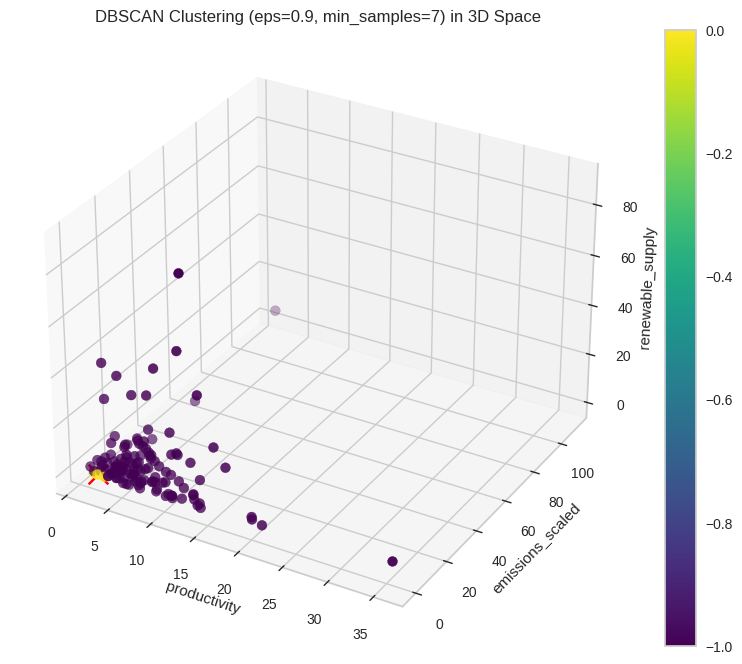

In [ ]:
# Terapkan DBSCAN dengan parameter terbaik berdasarkan hasil Silhouette Score

dbscan_best = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters_best = dbscan_best.fit_predict(data_numeric)

# Membuat plot 3D untuk hasil clustering DBSCAN
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot hasil clustering dengan warna berdasarkan cluster_labels
scatter = ax.scatter(data_numeric['productivity'], data_numeric['emissions_scaled'], data_numeric['renewable_supply'],
                     c=clusters_best, cmap='viridis', s=50)

# Menambahkan "centroid" (rata-rata titik per klaster)
unique_clusters = set(clusters_best) - {-1}  # Menghindari noise dengan label -1
for cluster in unique_clusters:
    # Ambil titik yang termasuk dalam klaster tersebut
    cluster_points = data_numeric[clusters_best == cluster]
    centroid = np.mean(cluster_points, axis=0)
    ax.scatter(centroid[0], centroid[1], centroid[2], c='red', s=200, marker='x')

# Menambahkan label dan judul
ax.set_xlabel('productivity')
ax.set_ylabel('emissions_scaled')
ax.set_zlabel('renewable_supply')
plt.title(f'DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples}) in 3D Space')

# Menambahkan color bar untuk cluster
plt.colorbar(scatter, ax=ax)

# Menampilkan plot
plt.show()

**Interpretasi Hasil Clustering DBSCAN**

Dapat kita lihat dari scatter plot diatas, terdapat 1 cluster berwarna kuning, yang dimana cluster tersebut merupakan cluster utama (cluster dengan label 0). Selain itu, terdapat pula cluster berwarna ungu, yang dimana cluster tersebut merupakan cluster outlier (cluster dengan label -1). Dapat kita lihat pada scatter plot diatas, bahwa DBSCAN kurang baik dalam mengclusterkan data ini, hampir seluruh data terdektesi sebagai oulier. Selain itu, DBSCAN score silhouette yang diperoleh DBSCAN sangat kecil (buruk), yaitu hanya sebesar -0.1843. Sehingga dapat disimpulkan bahwa DBSCAN kurang cocok digunakan untuk data ini.

### **Agglomerative Hierarchical Clustering**

**Agglomerative** merupakan salah satu algoritma untuk pemodelan clustering yang berbasis pada hierarkial. Algoritma ini cocok untuk situasi di mana data memiliki struktur hierarki atau jika kita ingin mengamati hubungan bertingkat antara data. Algoritma ini juga tidak membutuhkan jumlah cluster yang harus ditentukan dari awal, sehingga Anda bisa mengekstrak cluster di berbagai level hierarki, sesuai dengan kebutuhan. Dengan metode ini, kita bisa mencoba beberapa linkage seperti ward, average, atau complete untuk menentukan keterkaitan antar-cluster.


In [ ]:
from sklearn.cluster import AgglomerativeClustering  # Import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range nilai n_cluster yang akan dievaluasi
range_n_clusters = list(range(2, 11))

# Linkage yang ingin digunakan (misal: 'ward')
linkage = 'ward'

best_n_clusters = 2  # Inisialisasi dengan nilai default
best_silhouette_score = -1  # Inisialisasi dengan nilai terburuk

for n_clusters in range_n_clusters:
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)  # Now AgglomerativeClustering is defined
    cluster_labels = cluster_model.fit_predict(data_numeric)

    silhouette_avg = silhouette_score(data_numeric, cluster_labels)
    print(f"For n_clusters={n_clusters}, the silhouette score is: {silhouette_avg}")

    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_n_clusters = n_clusters

print(f"\nOptimal n_clusters: {best_n_clusters} with silhouette score: {best_silhouette_score}")

For n_clusters=2, the silhouette score is: 0.7148246113736402
For n_clusters=3, the silhouette score is: 0.7305033289065586
For n_clusters=4, the silhouette score is: 0.4044752147040602
For n_clusters=5, the silhouette score is: 0.4362394092959787
For n_clusters=6, the silhouette score is: 0.43939149364759916
For n_clusters=7, the silhouette score is: 0.41769148280806884
For n_clusters=8, the silhouette score is: 0.4012977810334528
For n_clusters=9, the silhouette score is: 0.3962347331913142
For n_clusters=10, the silhouette score is: 0.3997769588582951

Optimal n_clusters: 3 with silhouette score: 0.7305033289065586


In [ ]:
# Menggunakan ward linkage
cluster_model = AgglomerativeClustering(n_clusters=3, linkage=linkage)
clusters_agg = cluster_model.fit_predict(data_numeric)
clusters_agg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Hitung Silhouette Score
silhouette_avg = silhouette_score(data_numeric, clusters_agg)
print(f"Silhouette Score untuk Agglomerative Clustering dengan 3 clusters: {silhouette_avg}")

Silhouette Score untuk Agglomerative Clustering dengan 3 clusters: 0.7305033289065586


Berdasarkan output diatas, dapat disimpulkan bahwa untuk n_clusters = 3 menghasilkan nilai silhouette yang tertinggi, yaitu 0,7305. Semakin tinggi nilai rata-rata silhouette, menunjukkan suatu peng-cluster-an yang baik.

In [ ]:
# Memasukkan kolom clusters ke df
df_agg = df.copy()
df_agg['cluster'] = clusters_agg
df_agg

,REF_AREA,Reference area,TIME_PERIOD,productivity,emissions,renewable_supply,sustainability_category,country_pattern,emissions_scaled,cluster
0,ALB,Albania,2020,10.88,3.39,26.48,Low,Green Leaders,-0.245015,0
1,DZA,Algeria,2020,4.21,134.52,0.10,Very Low,Industrial Giants,1.203535,0
2,AGO,Angola,2020,11.79,15.29,7.89,Very Low,Green Leaders,-0.113560,0
3,ARG,Argentina,2020,5.02,149.02,5.36,Very Low,Industrial Giants,1.363712,0
4,ARM,Armenia,2020,5.24,6.33,4.99,Very Low,Industrial Giants,-0.212538,0
...,...,...,...,...,...,...,...,...,...,...
135,UZB,Uzbekistan,2020,2.41,109.65,0.95,Very Low,Emerging Polluters,0.928804,0
136,VNM,Viet Nam,2020,3.24,297.62,7.45,Very Low,Emerging Polluters,3.005247,0
137,YEM,Yemen,2020,10.55,8.59,1.46,Very Low,Green Leaders,-0.187572,0
138,ZMB,Zambia,2020,10.34,5.83,10.18,Very Low,Green Leaders,-0.218061,0


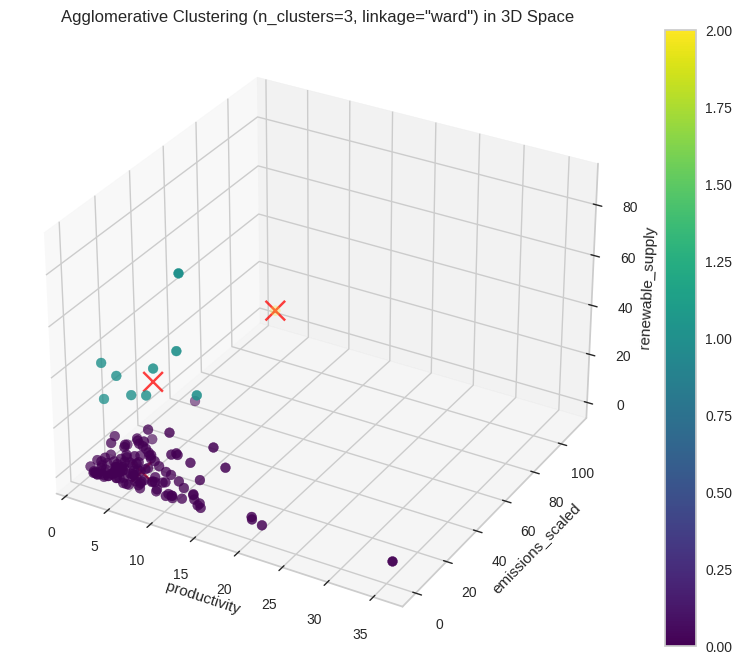

In [ ]:
# Membuat plot 3D untuk hasil clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting dengan pewarnaan berdasarkan cluster
scatter = ax.scatter(df_agg['productivity'], df_agg['emissions_scaled'], df_agg['renewable_supply'],
                     c=df_agg['cluster'], cmap='viridis', s=50)

# Menampilkan centroid dari cluster
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
           c='red', s=200, alpha=0.75, marker='x')

# Label dan judul plot
ax.set_xlabel('productivity')
ax.set_ylabel('emissions_scaled')
ax.set_zlabel('renewable_supply')
plt.title(f'Agglomerative Clustering (n_clusters={best_n_clusters}, linkage="{linkage}") in 3D Space')

# Menambahkan color bar untuk cluster
plt.colorbar(scatter)

# Menampilkan plot
plt.show()




**Interpretasi Hasil Clustering Hierarchical:**

Berdasarkan hasil clustering dan visualisasi yang telah dilakukan, kita dapat menyimpulkan bahwa data telah dibagi menjadi 3 cluster yaitu cluster 0, cluster 1, dan cluster 2.

**Cluster 0:** Cluster ini menggambarkan kondisi mayoritas negara dengan produktivitas menengah dan emisi relatif rendah. Namun, tingkat pasokan energi terbarukan yang rendah, yang dimana ini menunjukkan bahwa negara tersebut memiliki ketergantungan besar pada energi fosil. Untuk meningkatkan keberlanjutan dan efisiensi, negara-negara yang termasuk dalam klaster ini membutuhkan dorongan untuk mengadopsi energi terbarukan melalui subsidi, insentif pajak, atau kolaborasi dengan penyedia teknologi hijau. Selain itu, optimalisasi operasional dengan teknologi rendah karbon dapat membantu mengurangi emisi tanpa mengorbankan produktivitas. Cluster ini memiliki potensi besar untuk menjadi lebih efisien jika mampu memanfaatkan praktik terbaik dari Cluster 1.

**Cluster 1:** Negara-negara yang masuk kedalam cluster ini merupakan contoh keberhasilan dengan produktivitas tinggi, emisi sangat rendah, dan penggunaan energi terbarukan yang dominan. Negara-negara dalam klaster ini telah berhasil memadukan keberlanjutan dengan efisiensi operasional melalui adopsi teknologi hijau dan pengelolaan jejak karbon yang optimal. Cluster ini dapat menjadi model bagi negara-negara dalam cluster lain, dengan berbagi praktik terbaik dan teknologi yang digunakan. Pengembangan lebih lanjut dapat dilakukan dengan memperluas dampaknya melalui kemitraan strategis atau peningkatan kapasitas dalam infrastruktur energi hijau.

**Cluster 2:** Cluster ini berisi negara dengan produktivitas yang sangat rendah (2.39) dan emisi yang sangat tinggi (110.77), menunjukkan adanya ketidakefisienan besar dalam operasional dan penggunaan energi. Ketergantungan pada energi fosil yang tidak efisien (pasokan energi terbarukan hanya 6.60) memperburuk kondisi ini. Negara-negara dalam klaster ini memerlukan audit mendalam untuk memahami akar masalah dan perlu segera melakukan transformasi besar-besaran, termasuk investasi dalam teknologi rendah karbon dan efisiensi energi. Dukungan khusus, baik berupa insentif finansial maupun bantuan teknis, sangat dibutuhkan untuk membantu entitas ini bergerak ke arah yang lebih berkelanjutan.

### **GMM**

**GMM** adalah metode clustering probabilistik yang menggunakan asumsi bahwa data dalam setiap cluster mengikuti distribusi Gaussian (Normal). GMM cocok untuk data yang mungkin tumpang tindih antar-cluster atau memiliki variasi dalam distribusi dalam setiap cluster. GMM juga memungkinkan bentuk cluster yang lebih fleksibel daripada K-Means yang hanya menghasilkan cluster berbentuk bulat. Dalam hal ini, GMM dapat digunakan untuk mengidentifikasi cluster dengan lebih presisi.

In [ ]:
# Uji nilai silhouette score dari Model GMM dengan variasi n_components

# Tentukan rentang nilai n_components yang ingin diuji
n_components_range = range(2, 11)

# Inisialisasi list untuk menyimpan skor silhouette
silhouette_scores_gmm = []

# Loop untuk setiap nilai n_components
for n_components in n_components_range:
    # Inisialisasi model GMM
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(data_numeric)
    cluster_labels_gmm = gmm.predict(data_numeric)
    silhouette_avg_gmm = silhouette_score(data_numeric, cluster_labels_gmm)
    silhouette_scores_gmm.append((n_components, silhouette_avg_gmm, len(set(cluster_labels_gmm))))

    # Cetak skor silhouette dan jumlah cluster untuk setiap n_components
    print(f"For n_components={n_components}, the silhouette score is: {silhouette_avg_gmm}, Number of Clusters: {len(set(cluster_labels_gmm))}")

For n_components=2, the silhouette score is: 0.041274217544233695, Number of Clusters: 2
For n_components=3, the silhouette score is: 0.004331717962228499, Number of Clusters: 3
For n_components=4, the silhouette score is: 0.014781036326778732, Number of Clusters: 4
For n_components=5, the silhouette score is: 0.03948179539759963, Number of Clusters: 5
For n_components=6, the silhouette score is: 0.02389377407796957, Number of Clusters: 6
For n_components=7, the silhouette score is: 0.06224101445178974, Number of Clusters: 7
For n_components=8, the silhouette score is: 0.0947615603109765, Number of Clusters: 8
For n_components=9, the silhouette score is: 0.05648108702828139, Number of Clusters: 9
For n_components=10, the silhouette score is: 0.13397567605238903, Number of Clusters: 10


Berdasarkan output diatas, dapat disimpulkan bahwa untuk n_components = 3 menghasilkan nilai silhouette yang lumayan rendah yaitu 0,0026. Semakin rendah score silhouette yang diperoleh, maka akan semakin buruk model tersebut dalam melakukan clustering.

In [ ]:
# Uji coba clustering dengan GMM

# Inisialisasi GMM
gmm = GaussianMixture(n_components=3)
clusters = gmm.fit_predict(data_numeric)
clusters

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score
silhouette_avg = silhouette_score(data_numeric, clusters)
print(f"Silhouette Score untuk GMM dengan 3 clusters: {silhouette_avg}")

Silhouette Score untuk GMM dengan 3 clusters: 0.00269331082202441


In [ ]:
# Memasukkan kolom data clusters ke dalam dataFrame pca_df_filtered_gmm
df_gmm = df.copy()
df_gmm['cluster'] = clusters
df_gmm['cluster'].value_counts()

,count
cluster,
1,88
0,51
2,1


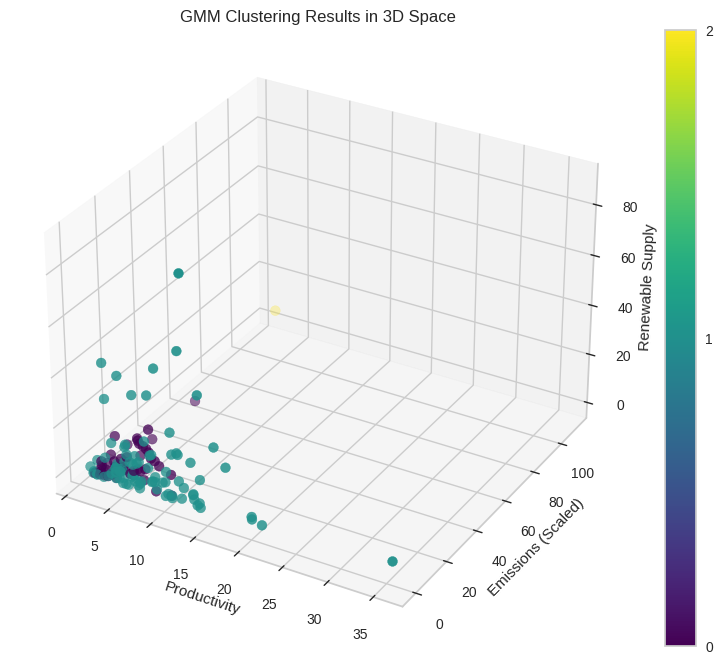

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'df' contains your data with 'cluster_gmm' column
# 'data_numeric' from your code: df[['productivity', 'emissions_scaled', 'renewable_supply']]

# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on cluster_gmm
scatter = ax.scatter(df['productivity'], df['emissions_scaled'], df['renewable_supply'],
                     c=df_gmm['cluster'], cmap='viridis', s=50)

# Set labels and title
ax.set_xlabel('Productivity')
ax.set_ylabel('Emissions (Scaled)')
ax.set_zlabel('Renewable Supply')
plt.title('GMM Clustering Results in 3D Space')

# Add a color bar
# Get unique cluster labels
unique_clusters = np.unique(df_gmm['cluster'])

# Set colorbar ticks and labels
cbar = plt.colorbar(scatter, ticks=unique_clusters)
cbar.ax.set_yticklabels(unique_clusters)

# Show the plot
plt.show()


**Interpretasi Hasil Clustering GMM**


Dari model clustering GMM yang telah dilakukan, dihasilkan 3 cluster, yaitu cluster 0, cluster 1, dan cluster 2.

**Cluster 0 :** Negara yang termasuk ke dalam cluster ini kemungkinan beroperasi di sektor menengah yang memiliki kesadaran lingkungan yang berkembang. Mereka menunjukkan keseimbangan antara produktivitas dan dampak lingkungan, menjadikannya kandidat ideal untuk perbaikan bertahap menuju keberlanjutan. Pemerintah dapat memberikan insentif tambahan untuk mempercepat adopsi energi terbarukan dan efisiensi operasional dalam cluster ini. Dengan investasi yang tepat, entitas dalam cluster ini dapat berkembang menjadi entitas yang lebih ramah lingkungan, bahkan mendekati karakteristik Cluster 0. Mereka juga dapat dijadikan mitra dalam transfer teknologi hijau ke cluster lain.

**Cluster 1 :** Cluster ini terdiri dari negara-negara yang sangat efisien dan ramah lingkungan. Negara-negara yang masuk kedalam cluster ini kemungkinan beroperasi di sektor dengan akses mudah ke teknologi hijau, seperti pembangkit energi terbarukan atau industri yang telah sepenuhnya mengadopsi standar keberlanjutan. Untuk mempertahankan keunggulan mereka, negara-negara dalam cluster ini dapat terus berinvestasi dalam inovasi teknologi hijau dan berbagi praktik terbaik dengan cluster lain. Pemerintah dan pemangku kepentingan dapat memberikan insentif tambahan agar entitas ini memperluas penerapan teknologi ramah lingkungan di wilayah atau sektor lainnya.


**Cluster 2 :** Cluster ini terdiri dari satu negara outlier dengan performa operasional yang sangat rendah (produktifitas 2.39) dan emisi yang sangat ekstrem (110.77), menjadikannya sebagai negara penyumbang emisi terbesar dalam dataset. Pasokan energi terbarukan juga sangat rendah (6.60), menunjukkan ketergantungan yang hampir total pada energi fosil dan teknologi yang tidak efisien. Kinerja buruk ini mungkin diakibatkan oleh kombinasi teknologi yang usang, manajemen yang tidak efektif, atau kurangnya akses terhadap sumber daya yang mendukung keberlanjutan. Negara dalam klaster ini memerlukan intervensi besar-besaran, seperti audit menyeluruh untuk memahami penyebab ketidakefisienan, diikuti dengan langkah transformasi operasional, termasuk adopsi teknologi rendah karbon dan efisiensi energi. Pemerintah atau lembaga internasional dapat memberikan dukungan finansial dan teknis untuk membantu negara ini melakukan perbaikan signifikan, karena potensi dampaknya terhadap pengurangan emisi sangat besar.



# **Kesimpulan Model Terbaik**

**Kesimpulan untuk model terbaik:**


Berdasarkan hasil clustering dengan 4 metode yang sudah dilakukan (K-means, DBSCAN, Hierarchical, dan GMM), kami menyimpulkan bahwa clustering dengan metode Hierachical lebih cocok untuk data ini. Berikut ini beberapa alasan nya:

- **Hasil Score Silhouette lebih baik dibandingkan 3 model lainnya, yaitu 0,7305**
- **Tidak Membutuhkan Jumlah Cluster Awal:** Salah satu keuntungan terbesar Hierarchical Clustering adalah Anda tidak perlu menentukan jumlah cluster (k) sebelum memulai proses clustering. Algoritma ini akan secara otomatis membentuk hierarki cluster, mulai dari kelompok yang sangat kecil hingga kelompok yang sangat besar. Hal ini sangat berguna ketika Anda tidak memiliki pengetahuan sebelumnya tentang struktur data Anda.
- **Fleksibelitas dalam Bentuk Cluster:** Hierarchical Clustering dapat mengidentifikasi cluster dengan berbagai bentuk, ukuran, dan densitas. Algoritma ini tidak membuat asumsi bahwa cluster harus berbentuk bulat atau konveks seperti pada K-means.
- **Informasi Hierarkis:** Hierarchical Clustering menghasilkan dendrogram, sebuah diagram yang menunjukkan bagaimana cluster bergabung secara hierarkis. Dendrogram ini memberikan informasi yang kaya tentang hubungan antara data points dan memungkinkan Anda untuk memilih tingkat pengelompokan yang sesuai dengan kebutuhan Anda.
- **Tidak Sensitif Terhadap Outlier:** Hierarchical Clustering umumnya kurang sensitif terhadap outlier dibandingkan K-means. Outlier cenderung membentuk cluster kecil sendiri pada tingkat yang lebih rendah dalam hierarki.
- **Cocok untuk Data dengan Struktur Kompleks:** Jika data Anda memiliki struktur yang kompleks, dengan sub-cluster yang saling tumpang tindih atau bentuk yang tidak teratur, Hierarchical Clustering dapat lebih efektif dalam mengidentifikasi struktur tersebut.

#**Visualisasi**

#**visualisasi tabel karakteristik cluster tiap model**

In [ ]:
from IPython.display import HTML

kmeans_tabel = """
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <style>
    body {
      font-family: Arial, sans-serif;
    }
    table {
      border-collapse: separate;
      border-spacing: 0;
      width: 100%;
      margin-bottom: 20px;
    }
    th, td {
      border: 1px solid #759b69;
      padding: 8px;
      text-align: left;
      font-size: 9px; /* Ukuran tulisan lebih kecil */
    }
    th {
      background-color: #759b69;
      color: white; /* Warna tulisan pada header tetap putih */
    }
    td {
      color: black; /* Warna tulisan pada bagian isi diubah menjadi hitam */
    }
    tr:nth-child(even) {
      background-color: #b7cc62;
    }
    tr:nth-child(odd) {
      background-color: #eaf1dd;
    }
    tr:hover {
      background-color: #d4e4b1;
    }
  </style>
</head>
<body>

<h2>Cluster K-Means Analysis</h2>

<table>
  <thead>
    <tr>
      <th>Cluster</th>
      <th>Karakteristik</th>
      <th>Posisi (PC1, PC2)</th>
      <th>Deskripsi</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Cluster 0</td>
      <td>Produktivitas Sedang, Emisi Tinggi, Energi Terbarukan Rendah</td>
      <td>PC1 Positif, PC2 Negatif</td>
      <td>Negara-negara di cluster ini memiliki tingkat produktivitas sedang, namun emisi yang dihasilkan relatif tinggi. Ketergantungan pada bahan bakar fosil masih dominan, sementara penggunaan energi terbarukan sangat rendah. Diperlukan modernisasi teknologi, diversifikasi energi, dan kesadaran lingkungan untuk transisi ke energi yang lebih berkelanjutan.</td>
    </tr>
    <tr>
      <td>Cluster 1</td>
      <td>Produktivitas Tinggi, Emisi Rendah, Energi Terbarukan Tinggi</td>
      <td>PC1 Negatif, PC2 Positif</td>
      <td>Cluster ini mencakup negara-negara dengan produktivitas tinggi dan efisiensi energi yang sangat baik. Emisi rendah dan penggunaan energi terbarukan yang signifikan mencerminkan keberhasilan mereka dalam keberlanjutan. Negara-negara ini menjadi model ideal dengan praktik terbaik untuk dibagikan kepada klaster lain.</td>
    </tr>
    <tr>
      <td>Cluster 2</td>
      <td>Produktivitas Rendah, Emisi Sangat Tinggi, Energi Terbarukan Rendah</td>
      <td>PC1 Positif, PC2 Positif</td>
      <td>Negara-negara ini memiliki produktivitas sangat rendah dengan emisi ekstrem dan kontribusi energi terbarukan yang minim. Tantangan mencakup inefisiensi besar, teknologi usang, dan infrastruktur tidak memadai. Dibutuhkan reformasi teknologi, investasi dalam energi bersih, serta penerapan regulasi ketat untuk mengurangi emisi.</td>
    </tr>
  </tbody>
</table>



</body>
</html>


"""

display(HTML(kmeans_tabel))

Cluster,Karakteristik,"Posisi (PC1, PC2)",Deskripsi
Cluster 0,"Produktivitas Sedang, Emisi Tinggi, Energi Terbarukan Rendah","PC1 Positif, PC2 Negatif","Negara-negara di cluster ini memiliki tingkat produktivitas sedang, namun emisi yang dihasilkan relatif tinggi. Ketergantungan pada bahan bakar fosil masih dominan, sementara penggunaan energi terbarukan sangat rendah. Diperlukan modernisasi teknologi, diversifikasi energi, dan kesadaran lingkungan untuk transisi ke energi yang lebih berkelanjutan."
Cluster 1,"Produktivitas Tinggi, Emisi Rendah, Energi Terbarukan Tinggi","PC1 Negatif, PC2 Positif",Cluster ini mencakup negara-negara dengan produktivitas tinggi dan efisiensi energi yang sangat baik. Emisi rendah dan penggunaan energi terbarukan yang signifikan mencerminkan keberhasilan mereka dalam keberlanjutan. Negara-negara ini menjadi model ideal dengan praktik terbaik untuk dibagikan kepada klaster lain.
Cluster 2,"Produktivitas Rendah, Emisi Sangat Tinggi, Energi Terbarukan Rendah","PC1 Positif, PC2 Positif","Negara-negara ini memiliki produktivitas sangat rendah dengan emisi ekstrem dan kontribusi energi terbarukan yang minim. Tantangan mencakup inefisiensi besar, teknologi usang, dan infrastruktur tidak memadai. Dibutuhkan reformasi teknologi, investasi dalam energi bersih, serta penerapan regulasi ketat untuk mengurangi emisi."


In [ ]:
from IPython.display import HTML

dbscan_tabel = """
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <style>
    body {
      font-family: Arial, sans-serif;
    }
    table {
      border-collapse: separate;
      border-spacing: 0;
      width: 100%;
      margin-bottom: 20px;
    }
    th, td {
      border: 1px solid #759b69;
      padding: 8px;
      text-align: left;
      font-size: 9px; /* Ukuran tulisan lebih kecil */
    }
    th {
      background-color: #759b69;
      color: white; /* Warna tulisan pada header tetap putih */
    }
    td {
      color: black; /* Warna tulisan pada bagian isi diubah menjadi hitam */
    }
    tr:nth-child(even) {
      background-color: #b7cc62;
    }
    tr:nth-child(odd) {
      background-color: #eaf1dd;
    }
    tr:hover {
      background-color: #d4e4b1;
    }
  </style>
</head>
<body>

<h2>Cluster DBSCAN Analysis</h2>

<table>
  <thead>
    <tr>
      <th>Cluster</th>
      <th>Karakteristik</th>
      <th>Jumlah Data</th>
      <th>Deskripsi</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Cluster 0</td>
      <td>Cluster Utama</td>
      <td>Mayoritas Data</td>
      <td>Cluster utama ini mencakup sebagian besar data, menunjukkan pola umum yang tidak menonjolkan perbedaan signifikan di antara anggota cluster. Namun, model DBSCAN kurang efektif dalam membedakan data menjadi beberapa cluster yang jelas pada dataset ini.</td>
    </tr>
    <tr>
      <td>Cluster -1</td>
      <td>Outlier</td>
      <td>Hampir Seluruh Data</td>
      <td>Cluster dengan label -1 diidentifikasi sebagai outlier oleh DBSCAN. Hampir seluruh data masuk ke dalam kategori ini, mengindikasikan bahwa parameter DBSCAN kurang cocok atau dataset tidak memiliki pola yang sesuai dengan metode ini. Skor silhouette negatif (-0.1843) memperkuat kesimpulan bahwa model ini kurang ideal untuk data yang digunakan.</td>
    </tr>
  </tbody>
</table>





</body>
</html>


"""

display(HTML(dbscan_tabel))

Cluster,Karakteristik,Jumlah Data,Deskripsi
Cluster 0,Cluster Utama,Mayoritas Data,"Cluster utama ini mencakup sebagian besar data, menunjukkan pola umum yang tidak menonjolkan perbedaan signifikan di antara anggota cluster. Namun, model DBSCAN kurang efektif dalam membedakan data menjadi beberapa cluster yang jelas pada dataset ini."
Cluster -1,Outlier,Hampir Seluruh Data,"Cluster dengan label -1 diidentifikasi sebagai outlier oleh DBSCAN. Hampir seluruh data masuk ke dalam kategori ini, mengindikasikan bahwa parameter DBSCAN kurang cocok atau dataset tidak memiliki pola yang sesuai dengan metode ini. Skor silhouette negatif (-0.1843) memperkuat kesimpulan bahwa model ini kurang ideal untuk data yang digunakan."


In [ ]:
from IPython.display import HTML

hierarchical_tabel = """
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <style>
    body {
      font-family: Arial, sans-serif;
    }
    table {
      border-collapse: separate;
      border-spacing: 0;
      width: 100%;
      margin-bottom: 20px;
    }
    th, td {
      border: 1px solid #759b69;
      padding: 8px;
      text-align: left;
      font-size: 9px; /* Ukuran tulisan lebih kecil */
    }
    th {
      background-color: #759b69;
      color: white; /* Warna tulisan pada header tetap putih */
    }
    td {
      color: black; /* Warna tulisan pada bagian isi diubah menjadi hitam */
    }
    tr:nth-child(even) {
      background-color: #b7cc62;
    }
    tr:nth-child(odd) {
      background-color: #eaf1dd;
    }
    tr:hover {
      background-color: #d4e4b1;
    }
  </style>
</head>
<body>

<h2>Cluster Hierarchical Analysis</h2>

<table>
  <thead>
    <tr>
      <th>Cluster</th>
      <th>Karakteristik</th>
      <th>Deskripsi</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Cluster 0</td>
      <td>Produktivitas Menengah, Emisi Rendah, Energi Terbarukan Rendah</td>
      <td>Cluster ini mencakup negara-negara dengan produktivitas menengah dan emisi rendah, namun ketergantungan besar pada energi fosil terlihat dari pasokan energi terbarukan yang rendah. Negara-negara ini perlu dorongan untuk mengadopsi energi terbarukan dan teknologi rendah karbon guna meningkatkan keberlanjutan dan efisiensi.</td>
    </tr>
    <tr>
      <td>Cluster 1</td>
      <td>Produktivitas Tinggi, Emisi Sangat Rendah, Energi Terbarukan Tinggi</td>
      <td>Negara-negara dalam cluster ini merupakan contoh keberhasilan dengan produktivitas tinggi, emisi rendah, dan dominasi energi terbarukan. Mereka menggabungkan keberlanjutan dengan efisiensi operasional, menjadikannya model bagi negara lain dengan berbagi praktik terbaik dan teknologi hijau.</td>
    </tr>
    <tr>
      <td>Cluster 2</td>
      <td>Produktivitas Rendah, Emisi Sangat Tinggi, Energi Terbarukan Rendah</td>
      <td>Cluster ini mencakup negara-negara dengan produktivitas sangat rendah dan emisi tinggi, serta ketergantungan besar pada energi fosil yang tidak efisien. Negara-negara ini membutuhkan transformasi besar-besaran, termasuk investasi dalam teknologi rendah karbon dan efisiensi energi untuk mencapai keberlanjutan.</td>
    </tr>
  </tbody>
</table>





</body>
</html>


"""

display(HTML(hierarchical_tabel))

Cluster,Karakteristik,Deskripsi
Cluster 0,"Produktivitas Menengah, Emisi Rendah, Energi Terbarukan Rendah","Cluster ini mencakup negara-negara dengan produktivitas menengah dan emisi rendah, namun ketergantungan besar pada energi fosil terlihat dari pasokan energi terbarukan yang rendah. Negara-negara ini perlu dorongan untuk mengadopsi energi terbarukan dan teknologi rendah karbon guna meningkatkan keberlanjutan dan efisiensi."
Cluster 1,"Produktivitas Tinggi, Emisi Sangat Rendah, Energi Terbarukan Tinggi","Negara-negara dalam cluster ini merupakan contoh keberhasilan dengan produktivitas tinggi, emisi rendah, dan dominasi energi terbarukan. Mereka menggabungkan keberlanjutan dengan efisiensi operasional, menjadikannya model bagi negara lain dengan berbagi praktik terbaik dan teknologi hijau."
Cluster 2,"Produktivitas Rendah, Emisi Sangat Tinggi, Energi Terbarukan Rendah","Cluster ini mencakup negara-negara dengan produktivitas sangat rendah dan emisi tinggi, serta ketergantungan besar pada energi fosil yang tidak efisien. Negara-negara ini membutuhkan transformasi besar-besaran, termasuk investasi dalam teknologi rendah karbon dan efisiensi energi untuk mencapai keberlanjutan."


In [ ]:
from IPython.display import HTML

GMM_tabel = """
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <style>
    body {
      font-family: Arial, sans-serif;
    }
    table {
      border-collapse: separate;
      border-spacing: 0;
      width: 100%;
      margin-bottom: 20px;
    }
    th, td {
      border: 1px solid #759b69;
      padding: 8px;
      text-align: left;
      font-size: 9px; /* Ukuran tulisan lebih kecil */
    }
    th {
      background-color: #759b69;
      color: white; /* Warna tulisan pada header tetap putih */
    }
    td {
      color: black; /* Warna tulisan pada bagian isi diubah menjadi hitam */
    }
    tr:nth-child(even) {
      background-color: #b7cc62;
    }
    tr:nth-child(odd) {
      background-color: #eaf1dd;
    }
    tr:hover {
      background-color: #d4e4b1;
    }
  </style>
</head>
<body>

<h2>Cluster GMM Analysis</h2>

<table>
  <thead>
    <tr>
      <th>Cluster</th>
      <th>Karakteristik</th>
      <th>Deskripsi</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Cluster 0</td>
      <td>Produktivitas Menengah, Dampak Lingkungan Terjaga, Kesadaran Lingkungan Berkembang</td>
      <td>Negara-negara dalam cluster ini menunjukkan keseimbangan antara produktivitas dan dampak lingkungan. Mereka menjadi kandidat ideal untuk perbaikan menuju keberlanjutan dengan insentif tambahan untuk mempercepat adopsi energi terbarukan dan efisiensi operasional.</td>
    </tr>
    <tr>
      <td>Cluster 1</td>
      <td>Efisiensi Tinggi, Ramah Lingkungan, Penggunaan Teknologi Hijau</td>
      <td>Cluster ini mencakup negara-negara yang sangat efisien dan ramah lingkungan. Negara-negara ini telah mengadopsi teknologi hijau sepenuhnya dan dapat mempertahankan keunggulan mereka dengan terus berinvestasi dalam inovasi teknologi hijau dan berbagi praktik terbaik dengan negara lain.</td>
    </tr>
    <tr>
      <td>Cluster 2</td>
      <td>Produktivitas Rendah, Emisi Sangat Tinggi, Ketergantungan pada Energi Fosil</td>
      <td>Cluster ini berisi satu negara dengan produktivitas sangat rendah dan emisi ekstrem. Negara ini sangat bergantung pada energi fosil dan teknologi yang tidak efisien. Intervensi besar-besaran diperlukan untuk perbaikan, termasuk adopsi teknologi rendah karbon dan efisiensi energi untuk mengurangi dampak buruk terhadap keberlanjutan.</td>
    </tr>
  </tbody>
</table>






</body>
</html>


"""

display(HTML(GMM_tabel))

Cluster,Karakteristik,Deskripsi
Cluster 0,"Produktivitas Menengah, Dampak Lingkungan Terjaga, Kesadaran Lingkungan Berkembang",Negara-negara dalam cluster ini menunjukkan keseimbangan antara produktivitas dan dampak lingkungan. Mereka menjadi kandidat ideal untuk perbaikan menuju keberlanjutan dengan insentif tambahan untuk mempercepat adopsi energi terbarukan dan efisiensi operasional.
Cluster 1,"Efisiensi Tinggi, Ramah Lingkungan, Penggunaan Teknologi Hijau",Cluster ini mencakup negara-negara yang sangat efisien dan ramah lingkungan. Negara-negara ini telah mengadopsi teknologi hijau sepenuhnya dan dapat mempertahankan keunggulan mereka dengan terus berinvestasi dalam inovasi teknologi hijau dan berbagi praktik terbaik dengan negara lain.
Cluster 2,"Produktivitas Rendah, Emisi Sangat Tinggi, Ketergantungan pada Energi Fosil","Cluster ini berisi satu negara dengan produktivitas sangat rendah dan emisi ekstrem. Negara ini sangat bergantung pada energi fosil dan teknologi yang tidak efisien. Intervensi besar-besaran diperlukan untuk perbaikan, termasuk adopsi teknologi rendah karbon dan efisiensi energi untuk mengurangi dampak buruk terhadap keberlanjutan."


#**Visualisasi scatter plot untuk cluster model terbaik**

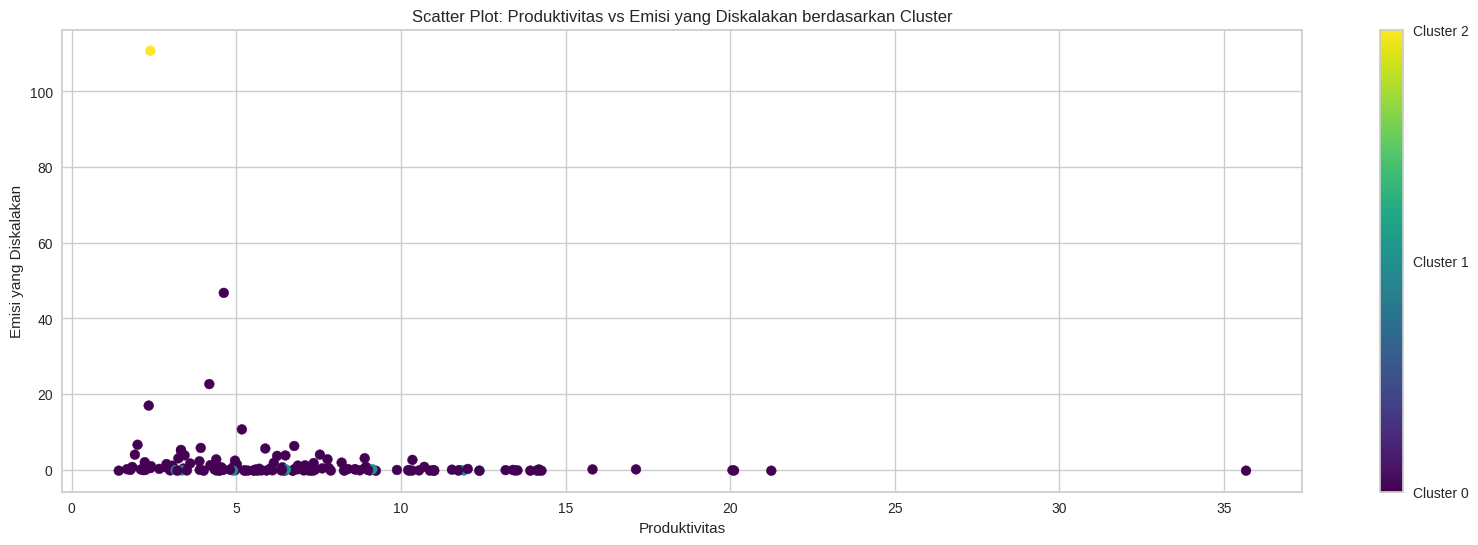

In [ ]:
# Scatter Plot Produktivitas vs Emisi yang Diskalakan dengan Cluster
plt.figure(figsize=(20,6))
scatter = plt.scatter(df_agg['productivity'], df_agg['emissions_scaled'],
                      c=df_agg['cluster'], cmap='viridis', s=50)

# Label dan Judul
plt.xlabel('Produktivitas')
plt.ylabel('Emisi yang Diskalakan')
plt.title('Scatter Plot: Produktivitas vs Emisi yang Diskalakan berdasarkan Cluster')

# Menambahkan color bar untuk cluster
cbar = plt.colorbar(scatter, ticks=unique_clusters)
cbar.ax.set_yticklabels([f'Cluster {cluster}' for cluster in unique_clusters])

# Menampilkan plot
plt.show()


**Interpretasi Hasil Scatter Plot Produktivitas vs Emisi yang diskalakan berdasarkan cluster**

* Cluster 0 (warna ungu) mendominasi dengan persebaran yang luas, menunjukkan mayoritas negara memiliki produktivitas rendah hingga tinggi (0-35) dengan tingkat emisi yang relatif rendah hingga menengah (0-50).
* Cluster 1 (warna hijau) hampir tidak terlihat, menandakan sangat sedikit negara dalam kategori ini, Cluster ini menggambarkan negara-negara dengan kondisi produktivitas dan emisi yang rendah.
* Cluster 2 (warna kuning) hanya memiliki satu negara dengan produktivitas rendah (bernilai sekitar 2) namun emisi yang sangat tinggi (sekitar 110).
Terdapat hubungan yang tidak terlalu kuat antara produktivitas dan emisi, ditunjukkan oleh pola sebaran yang cukup acak.

Secara keseluruhan, tampaknya tidak ada hubungan linier langsung antara produktivitas dan emisi yang diskalakan. Sebagian besar negara dengan produktivitas rendah tetap berada pada tingkat emisi yang rendah hingga sedang, tetapi ada pengecualian (outlier di Cluster 2). Negara-negara dengan produktivitas tinggi (Cluster 1) justru memiliki emisi yang lebih rendah, menunjukkan kemungkinan adanya efisiensi dalam pengelolaan emisi karbon di negara-negara ini.

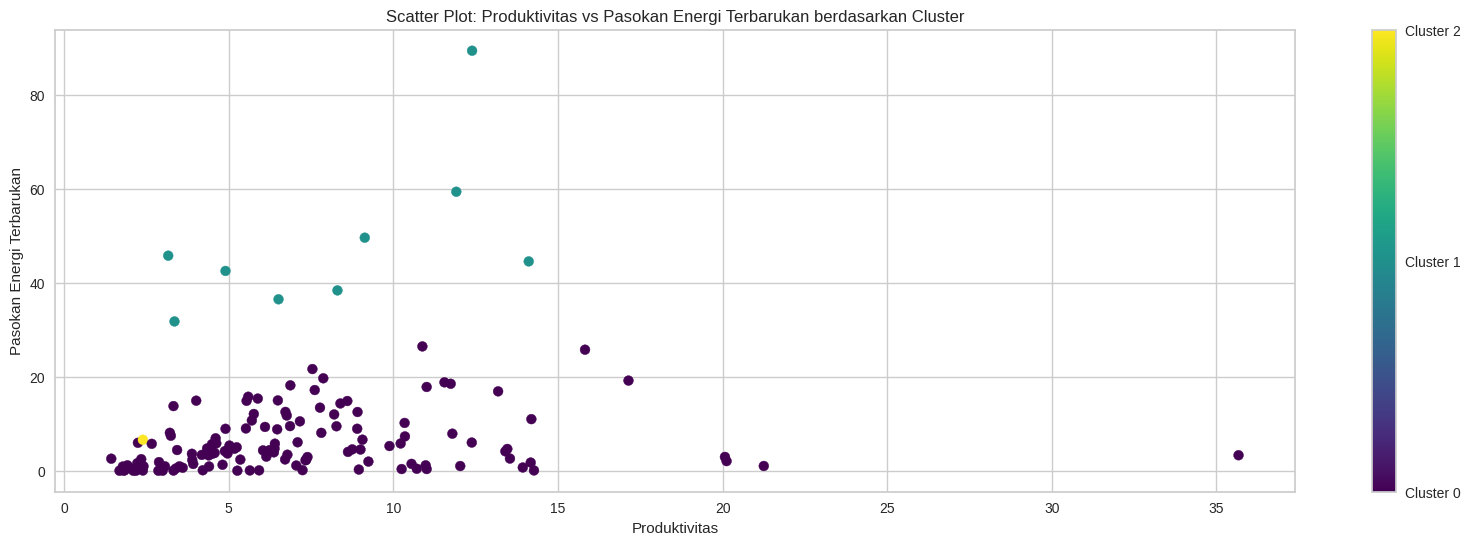

In [ ]:
# Scatter Plot Produktivitas vs Energi Terbarukan dengan Cluster
plt.figure(figsize=(20,6))
scatter = plt.scatter(df_agg['productivity'], df_agg['renewable_supply'],
                      c=df_agg['cluster'], cmap='viridis', s=50)

# Label dan Judul
plt.xlabel('Produktivitas')
plt.ylabel('Pasokan Energi Terbarukan')
plt.title('Scatter Plot: Produktivitas vs Pasokan Energi Terbarukan berdasarkan Cluster')

# Menambahkan color bar untuk cluster
cbar = plt.colorbar(scatter, ticks=unique_clusters)
cbar.ax.set_yticklabels([f'Cluster {cluster}' for cluster in unique_clusters])

# Menampilkan plot
plt.show()


**Interpretasi Hasil Scatter Plot Produktivitas vs Energi Terbarukan berdasarkan Cluster**

* Cluster 0 (Warna Ungu) membentuk pola sebaran yang luas pada sumbu produktivitas (0-35), serta mayoritas negara memiliki pasokan energi terbarukan yang rendah (0-20).Cluster ini menunjukkan negara-negara yang masih belum maksimal dalam pemanfaatan energi terbarukan
Beberapa negara menunjukkan produktivitas tinggi dengan dengan pasokan energi terbarukan rendah, yang mengindikasikan ketergantungan pada sumber energi non-terbarukan.

* Cluster 1 (Hijau) menunjukkan karakteristik yang sangat menarik, dimana nilai produktivitas yang moderat (5-15), namun pasokan energi terbarukan menengah hinga tinggi (40-90). Cluster ini mungkin merepresentasikan negara-negara yang telah berhasil dalam transisi ke energi bersih
Beberapa titik mencapai level energi terbarukan hingga 90%, menunjukkan pencapaian baik dalam adopsi energi hijau.

* Cluster 2 (Warna Kuning) menjadi cluster yang unik dimana hanya ada satu titik data dengan karakteristik produktivitas sangat rendah serta pasokan energi terbarukan sangat rendah (< 10). Posisi ini menunjukkan ketidakefisienan dalam kedua aspek, serta kemungkinan merepresentasikan negara dengan ketergantungan tinggi pada sumber energi fosil dan produktivitas ekonomi yang rendah.

Secara keseluruhan, tampaknya tidak ada hubungan linier langsung antara produktivitas dan pasokan energi terbarukan. Sebagian besar negara dengan produktivitas rendah (Cluster 0) juga memiliki pasokan energi terbarukan yang rendah. Namun, beberapa negara di Cluster 1 menunjukkan bahwa peningkatan produktivitas dapat disertai dengan peningkatan pasokan energi terbarukan. Outlier di Cluster 2 dengan produktivitas sangat rendah menunjukkan pasokan energi terbarukan yang minim, mencerminkan ketidakefisienan dalam transisi energi.

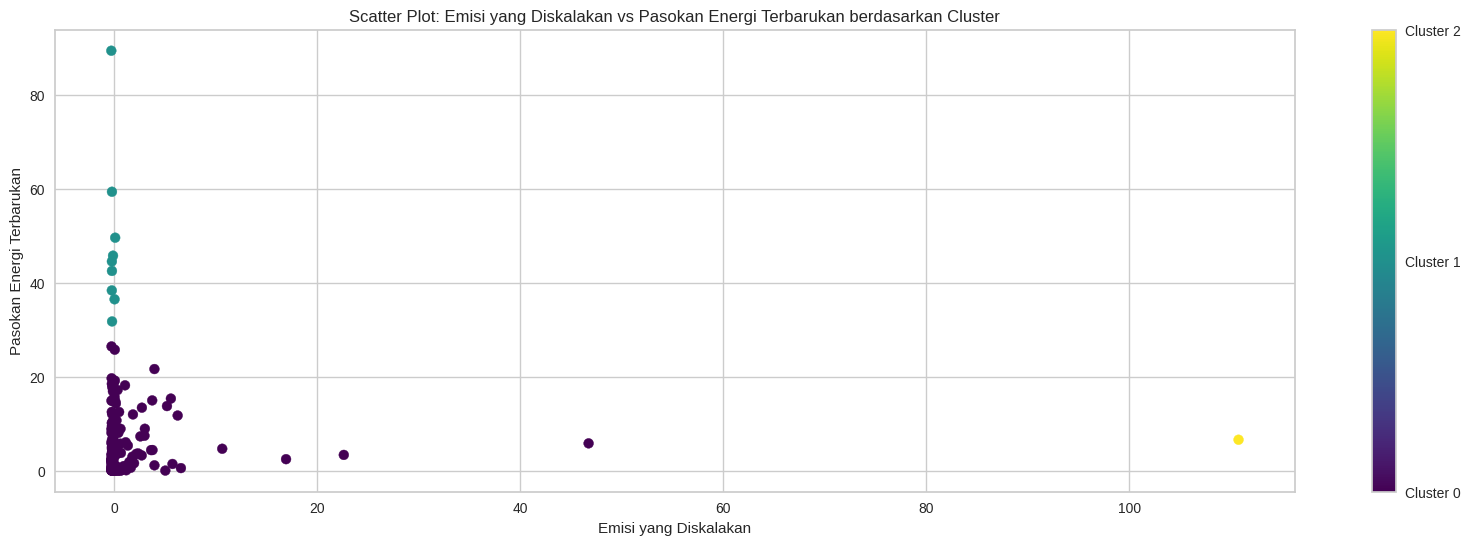

In [ ]:
# Scatter Plot Emisi yang Diskalakan vs Energi Terbarukan dengan Cluster
plt.figure(figsize=(20,6))
scatter = plt.scatter(df_agg['emissions_scaled'], df_agg['renewable_supply'],
                      c=df_agg['cluster'], cmap='viridis', s=50)

# Label dan Judul
plt.xlabel('Emisi yang Diskalakan')
plt.ylabel('Pasokan Energi Terbarukan')
plt.title('Scatter Plot: Emisi yang Diskalakan vs Pasokan Energi Terbarukan berdasarkan Cluster')

# Menambahkan color bar untuk cluster
cbar = plt.colorbar(scatter, ticks=unique_clusters)
cbar.ax.set_yticklabels([f'Cluster {cluster}' for cluster in unique_clusters])

# Menampilkan plot
plt.show()


**Interpretasi Hasil Scatter Plot Emisi yang diskalakan vs Energi Terbarukan berdasarkan Cluster**

* Cluster 0 (Warna Ungu) mmenggambarkan negara-negara yang terkonsentrasi pada area emisi yang rendah hingga menengah (0-50) dengan pasokan energi terbarukan rendah.

* Cluster 1 (Hijau) negara yang memiliki karakteristik  emisi sangat rendah dan memiliki pasokan energi terbarukan menengah hingga tinggi (40-90). Negara-negara ini kemungkinan sedang mulai beralih diri dari energi non-terbarukan menjadi energi yang lebih bersih.

* Cluster 2 (Warna Kuning) menjadi cluster yang unik dimana hanya ada satu titik data dengan karakteristik emisi sangat tinggi (sekitar 110) dan juga pasokan energi terbarukan sangat rendah (< 10). Karakteristik ini menunjukkan bahwa negara ini memiliki ketergantungan ekstrem pada sumber energi fosil serta kemungkinan industri berat yang intensif karbon.

Secara keseluruhan, tidak ada hubungan linier langsung antara emisi yang diskalakan dan pasokan energi terbarukan. Negara-negara dalam Cluster 0 memiliki emisi rendah dengan tingkat energi terbarukan yang bervariasi, sementara Cluster 1 menunjukkan fokus pada energi terbarukan tinggi dengan emisi rendah. Cluster 2 sebagai outlier mencerminkan ketidakseimbangan dengan emisi tinggi tetapi energi terbarukan rendah. Secara keseluruhan, tidak terlihat hubungan linier antara emisi yang diskalakan dan pasokan energi terbarukan, menunjukkan bahwa peningkatan energi terbarukan belum selalu berkorelasi dengan penurunan emisi karbon.

#**Memasukkan Data Sistem Carbon Trading**

In [ ]:
# Menambahkan Data Sistem Carbon Trading
df_ETS = pd.read_csv('https://docs.google.com/spreadsheets/d/158jrb2Xjwo294KkguXxmR93X-WorAUQuuQxnCNj-lZw/export?format=csv&gid=422312294')
df_ETS = df_ETS.rename(columns={'Code':'REF_AREA'})
df_ETS.head()

,Entity,REF_AREA,emissions_trading_system
0,Afghanistan,AFG,No ETS
1,Albania,ALB,No ETS
2,Algeria,DZA,No ETS
3,Andorra,AND,No ETS
4,Angola,AGO,No ETS


In [ ]:
df_select = df_ETS[['REF_AREA','emissions_trading_system']]
merged_data = pd.merge(df_agg, df_select, on=['REF_AREA'], how='left')
merged_data

,REF_AREA,Reference area,TIME_PERIOD,productivity,emissions,renewable_supply,sustainability_category,country_pattern,emissions_scaled,cluster,emissions_trading_system
0,ALB,Albania,2020,10.88,3.39,26.48,Low,Green Leaders,-0.245015,0,No ETS
1,DZA,Algeria,2020,4.21,134.52,0.10,Very Low,Industrial Giants,1.203535,0,No ETS
2,AGO,Angola,2020,11.79,15.29,7.89,Very Low,Green Leaders,-0.113560,0,No ETS
3,ARG,Argentina,2020,5.02,149.02,5.36,Very Low,Industrial Giants,1.363712,0,No ETS
4,ARM,Armenia,2020,5.24,6.33,4.99,Very Low,Industrial Giants,-0.212538,0,No ETS
...,...,...,...,...,...,...,...,...,...,...,...
135,UZB,Uzbekistan,2020,2.41,109.65,0.95,Very Low,Emerging Polluters,0.928804,0,No ETS
136,VNM,Viet Nam,2020,3.24,297.62,7.45,Very Low,Emerging Polluters,3.005247,0,No ETS
137,YEM,Yemen,2020,10.55,8.59,1.46,Very Low,Green Leaders,-0.187572,0,No ETS
138,ZMB,Zambia,2020,10.34,5.83,10.18,Very Low,Green Leaders,-0.218061,0,No ETS


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   REF_AREA                  140 non-null    object  
 1   Reference area            140 non-null    object  
 2   TIME_PERIOD               140 non-null    int64   
 3   productivity              140 non-null    float64 
 4   emissions                 140 non-null    float64 
 5   renewable_supply          140 non-null    float64 
 6   sustainability_category   140 non-null    category
 7   country_pattern           140 non-null    category
 8   emissions_scaled          140 non-null    float64 
 9   cluster                   140 non-null    int64   
 10  emissions_trading_system  139 non-null    object  
dtypes: category(2), float64(4), int64(2), object(3)
memory usage: 10.6+ KB


In [ ]:
# Mendownload Data
from google.colab import files

merged_data.to_csv('merged_data.csv', index=False)
files.download('merged_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>